Name: Xianqi Cao, Yuka Yamamoto, Kelly Ton

Development environment (Colab or local): Colab

# Deep Learning Analysis

- **Tasks:**
  1. Compare the performance of a small CNN (LeNet-5) with the results you got for PCA, LDA, and SVM using the Olivetti faces dataset
  2. Choose, implement (if not available in a library),  and run a baseline for the IMDB text classification from lecture
    - Consider what techniques would be appropriate for this task.
    - Also consider the fact that this is a text dataset, so some techniques might not work well or may be cumbersome to engineer.
    - Include a description of your baseline and explain why this baseline makes sense for this problem.
  3. Run a vanilla RNN on the IMDB text classification dataset and compare its performance against your baseline.
  4. Explore data augmentation techniques for both tasks.
    - For the image task, you may use the built-in Keras data augmentation function (tf.keras.preprocessing.image.ImageDataGenerator).
    - For the text task, you may find an external function that you import or write your own data augmentation.
    - Describe what data augmentation methods you used and the motivation behind them (why you think they'll help).

_Where it is relevant, make sure you follow deep learning best practices discussed in class. In particular, performing a hyperparameter search and setting up an proper train, dev, and test framework for evaluating hyperparameters and your final selected model._

- Evaluation scenarios:
  1. Facial Recognition
    - Use 20% of the images for training and 80% for testing
    - Use 50% of the images for training and 50% for testing
    - Use 80% of the images for training and 20% for testing
    - Always use the first K images per person for training, and the remaining ones for testing (see data split code below)
    - Plot CMC curve and confusion matrix for each combination of scenario

  2. Review Text Classification
    - Use 2,000 examples for training and 2,000 examples for testing (smaller than the example in lecture)
    - Experiment with several RNN configurations
    - Plot the training and validation plots for your RNN and for your baseline if your baseline has a training phase.
    - Plot a confusion matrix of the predictions.

- Discussion:
  1. Facial Recognition
    - Is LeNet-5 better than PCA/LDA/SVM?
    - Is there a clear difference in performance for different train/test data splits?
    - Does data augmentation improve the results?
  
  2. Review Text Classification
    - Is the vanilla RNN better than a simple baseline?
    - How sensitive is the RNN performance to hyperparameter selection?
    - Does data augmentation improve the results? More or less than for the facial recognition task? What properties of the two tasks do you think is leading to the data augmentation effects you are seeing?

## Olivetti faces dataset (AT&T Laboratories Cambridge)

As described on the original website:

"*There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).*"

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

- Classes: 40
- Samples per class: 10
- Samples total: 400
- Dimensionality: 4096 (64x64 pixels)
- Pixel values: real, between 0 and 1


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from google.colab.patches import cv2_imshow
import numpy as np  # for data manipulation

In [ ]:
import tensorflow as tf  # for neural network conception and training
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import to_categorical

# Get the dataset

In [ ]:
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 64, 64)


# Split the dataset

In [ ]:
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)


(200, 64, 64, 1) (200, 64, 64, 1)


# Visualize the splits

In [ ]:
def show_images(imgs, num_rows, num_cols):
  assert len(imgs) == num_rows*num_cols

  for i in range(num_rows):
    row = None
    for j in range(num_cols):
      if row is None:
        row = imgs[i*num_cols+j].reshape(img_height, img_width)*255.0
      else:
        row = np.concatenate((row, imgs[i*num_cols+j].reshape(img_height, img_width)*255.0), axis=1)
    cv2_imshow(row)

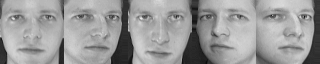

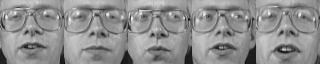

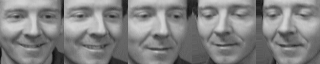

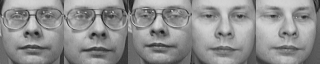

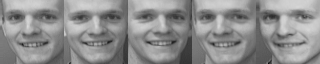

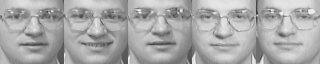

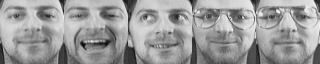

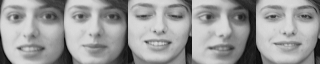

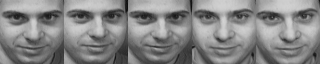

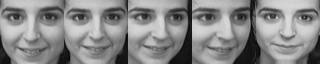

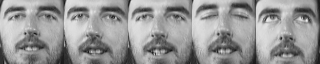

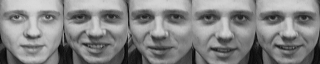

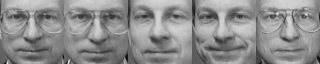

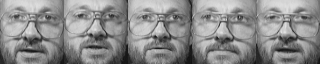

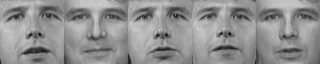

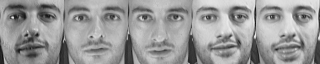

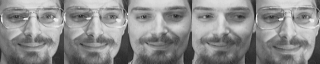

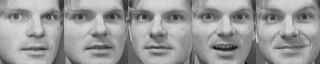

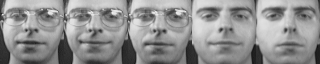

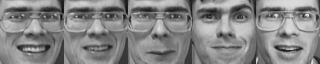

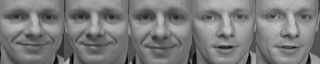

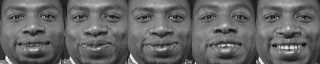

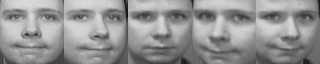

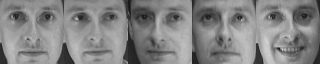

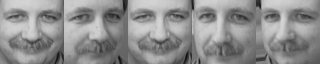

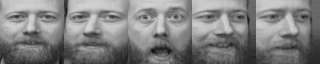

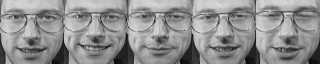

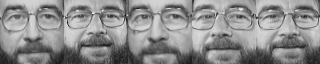

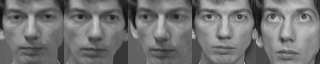

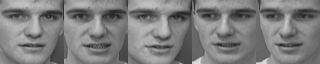

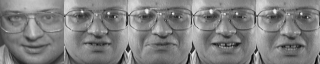

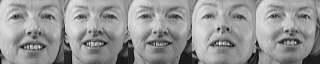

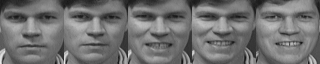

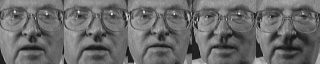

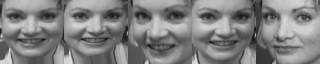

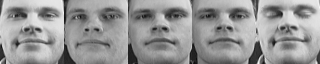

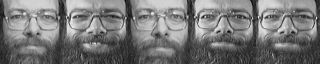

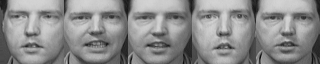

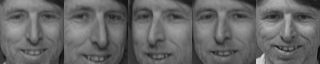

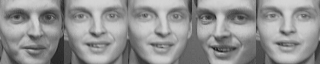

In [ ]:
show_images(x_train, N_IDENTITIES, GALLERY_SIZE)

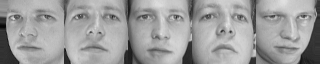

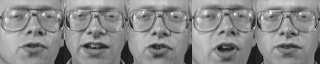

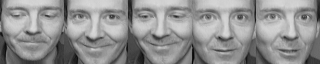

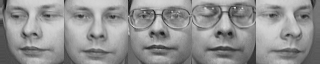

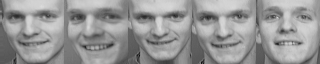

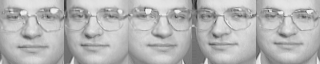

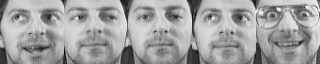

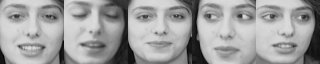

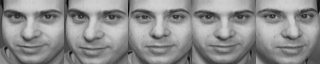

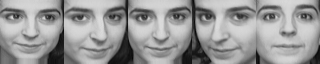

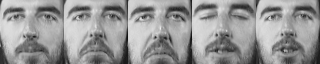

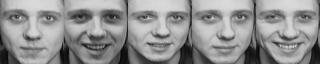

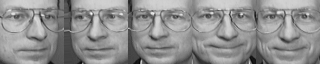

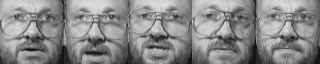

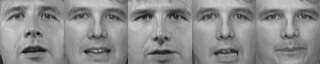

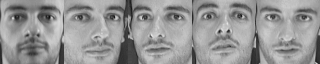

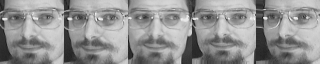

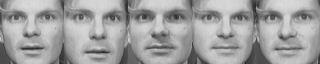

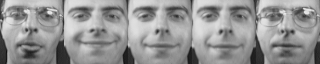

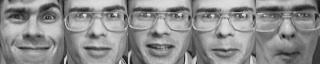

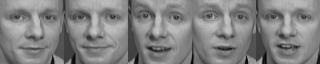

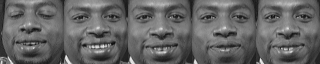

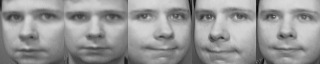

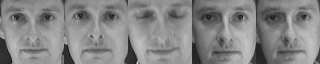

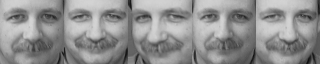

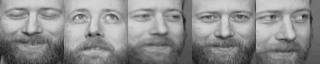

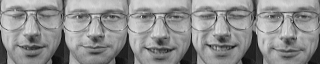

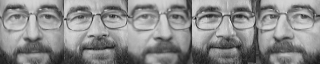

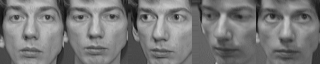

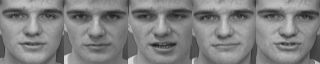

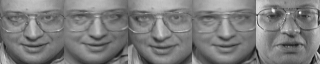

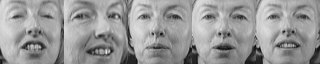

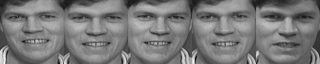

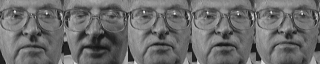

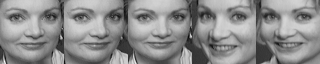

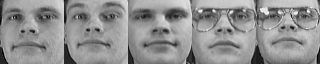

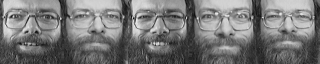

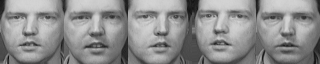

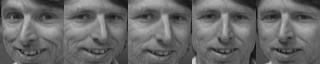

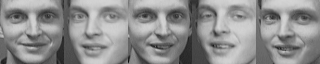

In [ ]:
show_images(x_test, N_IDENTITIES, 10 - GALLERY_SIZE)

# Run the experiments

Here is the code I used to get the results below!

In [ ]:
x_train = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_test = faces.target[probe_indices]

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape, '\n')

# data normalization
x_train = np.expand_dims(x_train, 3)
x_train = x_train.astype(np.float32)
x_train /= 255

x_test = np.expand_dims(x_test, 3)
x_test = x_test.astype(np.float32)
x_test /= 255

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape)

(200, 64, 64, 1) (200,) float32 int64
(200, 64, 64, 1) (200,) 

(200, 64, 64, 1, 1) (200,) float32 int64
(200, 64, 64, 1, 1) (200,)


In [ ]:
print(len(x_train))
if len(x_train) > 64:
    shuffle = np.random.permutation(len(x_train))
    x_val = x_train.take(shuffle[:64], axis=0)
    x_train = x_train.take(shuffle[64:], axis=0)
    y_val = y_train.take(shuffle[:64], axis=0)
    y_train = y_train.take(shuffle[64:], axis=0)
else:
    print("Not enough data to split as specified")

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_val.shape, y_val.shape)

200
(136, 64, 64, 1, 1) (136,) float32 int64
(64, 64, 64, 1, 1) (64,)


In [ ]:
learning_rate = 0.001
loss_function = 'sparse_categorical_crossentropy'
batch_size = 8

num_epochs = 10

In [ ]:
def CNN_fn():
  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

  early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
  model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

  history = model.fit(x=x_train, y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[model_save])

  plt.rcParams["figure.figsize"] = (20, 10)

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='lower right')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

  scores_train = model.evaluate(x_train, y_train, verbose=0)
  print('TRAINING SET\nLoss:', scores_train[0], '\nAccuracy:', scores_train[1])

  scores_val = model.evaluate(x_val, y_val, verbose=0)
  print('\nVALIDATION SET\nLoss:', scores_val[0], '\nAccuracy:', scores_val[1])

  scores_test = model.evaluate(x_test, y_test, verbose=0)
  print('\nTEST SET\nLoss:', scores_test[0], '\nAccuracy:', scores_test[1])


The code below is responsible for running through each evaluation scenario. It calls our CNN_fn() which runs our CNN implementation. We have produced a CMC curve and confusion matrix to display our model's results. The higher the training set accuracy, the more it will accumulate towards the main diagonal of the matrix.

Scenario: 20% training, 80% testing
Epoch 1/10
4/4 [==============================] - 2s 169ms/step - loss: 3.6885 - accuracy: 0.1111 - val_loss: 3.6898 - val_accuracy: 0.0092
Epoch 2/10
3/4 [=====================>........] - ETA: 0s - loss: 3.6763 - accuracy: 0.1250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 81ms/step - loss: 3.6775 - accuracy: 0.1111 - val_loss: 3.6917 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 94ms/step - loss: 3.6570 - accuracy: 0.1111 - val_loss: 3.6989 - val_accuracy: 0.0183
Epoch 4/10
4/4 [==============================] - 0s 69ms/step - loss: 3.5942 - accuracy: 0.0741 - val_loss: 3.7299 - val_accuracy: 0.0092
Epoch 5/10
4/4 [==============================] - 0s 79ms/step - loss: 3.5024 - accuracy: 0.1111 - val_loss: 3.8532 - val_accuracy: 0.0092
Epoch 6/10
4/4 [==============================] - 0s 71ms/step - loss: 3.3840 - accuracy: 0.1111 - val_loss: 4.1236 - val_accuracy: 0.0092
Epoch 7/10
4/4 [==============================] - 0s 80ms/step - loss: 3.2985 - accuracy: 0.1111 - val_loss: 4.3699 - val_accuracy: 0.0092
Epoch 8/10
4/4 [==============================] - 0s 71ms/step - loss: 3.2750 - accuracy: 0.1111 - val_loss: 4.4198 - val_accuracy: 0.0092
Epoch 9/10
4/4 [==================

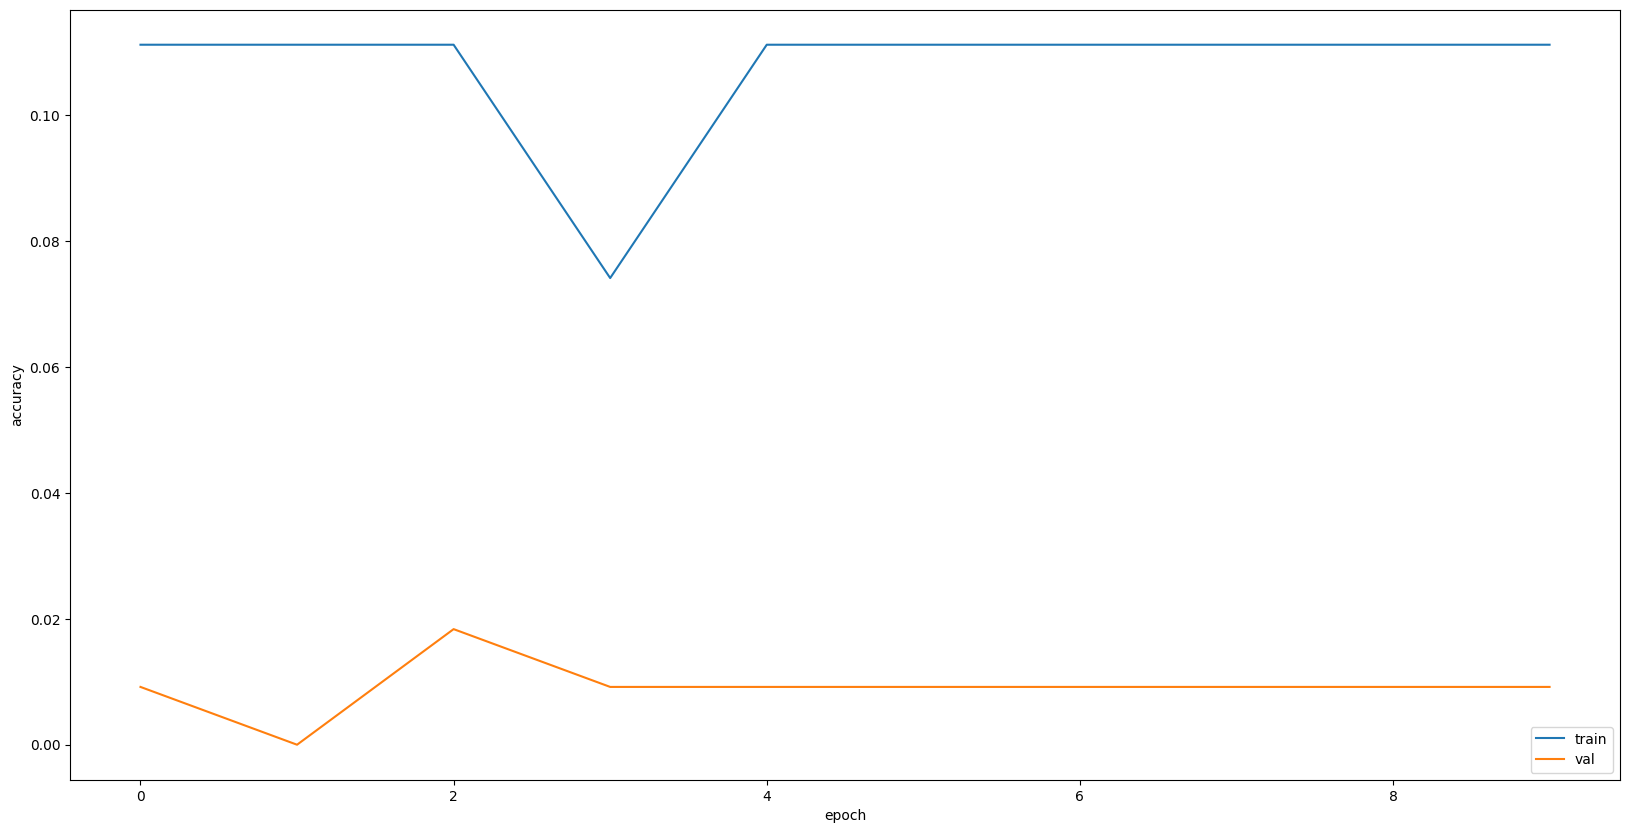

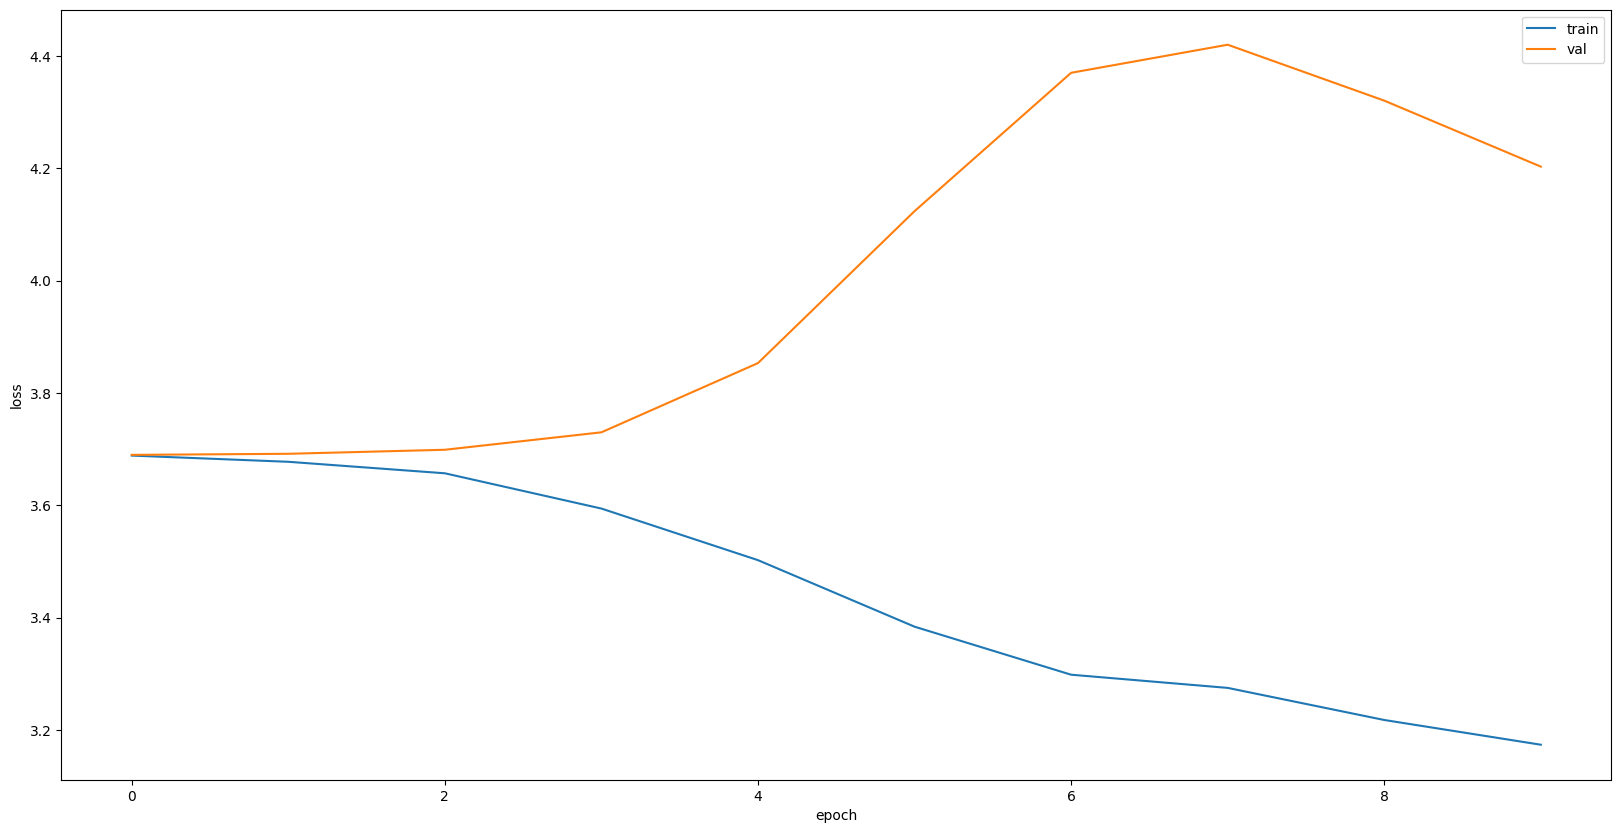

TRAINING SET
Loss: 3.150438070297241 
Accuracy: 0.1111111119389534

VALIDATION SET
Loss: 4.202877998352051 
Accuracy: 0.00917431153357029

TEST SET
Loss: 4.1140875816345215 
Accuracy: 0.02500000037252903
7/7 [==============================] - 0s 23ms/step


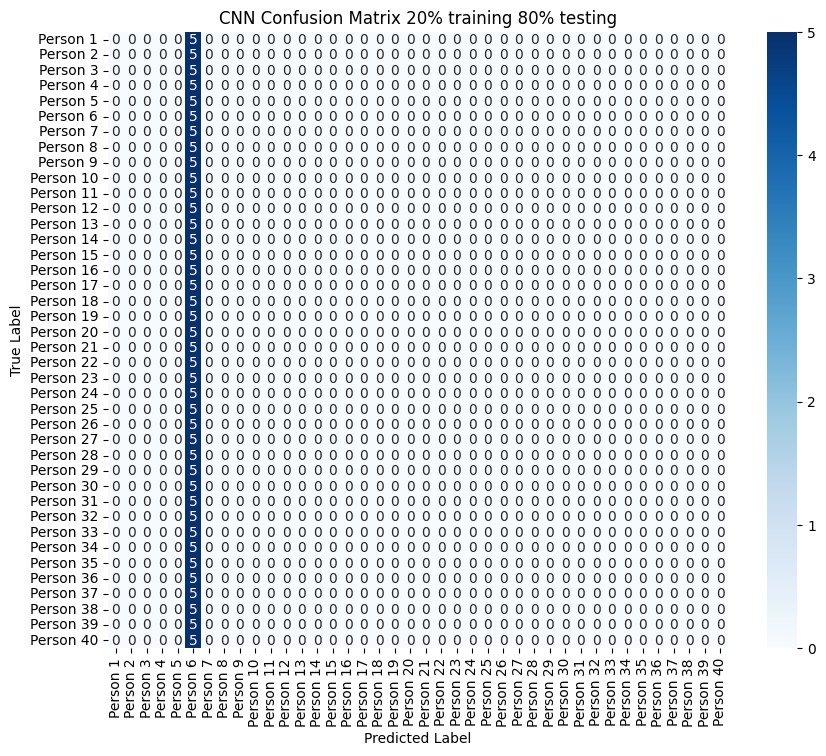



Scenario: 50% training, 50% testing
Epoch 1/10
9/9 [==============================] - 2s 78ms/step - loss: 3.7158 - accuracy: 0.0588 - val_loss: 3.8161 - val_accuracy: 0.0000e+00
Epoch 2/10
5/9 [===============>..............] - ETA: 0s - loss: 3.5451 - accuracy: 0.1000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 50ms/step - loss: 3.6027 - accuracy: 0.0588 - val_loss: 3.8081 - val_accuracy: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 0s 50ms/step - loss: 3.5943 - accuracy: 0.0588 - val_loss: 3.8290 - val_accuracy: 0.0000e+00
Epoch 4/10
9/9 [==============================] - 0s 49ms/step - loss: 3.5759 - accuracy: 0.0588 - val_loss: 3.8699 - val_accuracy: 0.0000e+00
Epoch 5/10
9/9 [==============================] - 0s 42ms/step - loss: 3.5598 - accuracy: 0.0588 - val_loss: 3.9159 - val_accuracy: 0.0000e+00
Epoch 6/10
9/9 [==============================] - 0s 49ms/step - loss: 3.5496 - accuracy: 0.0588 - val_loss: 3.9904 - val_accuracy: 0.0000e+00
Epoch 7/10
9/9 [==============================] - 0s 49ms/step - loss: 3.5343 - accuracy: 0.0588 - val_loss: 4.0095 - val_accuracy: 0.0000e+00
Epoch 8/10
9/9 [==============================] - 0s 40ms/step - loss: 3.5247 - accuracy: 0.0588 - val_loss: 4.0618 - val_accuracy: 0.0000e+00
Epoch 9/10

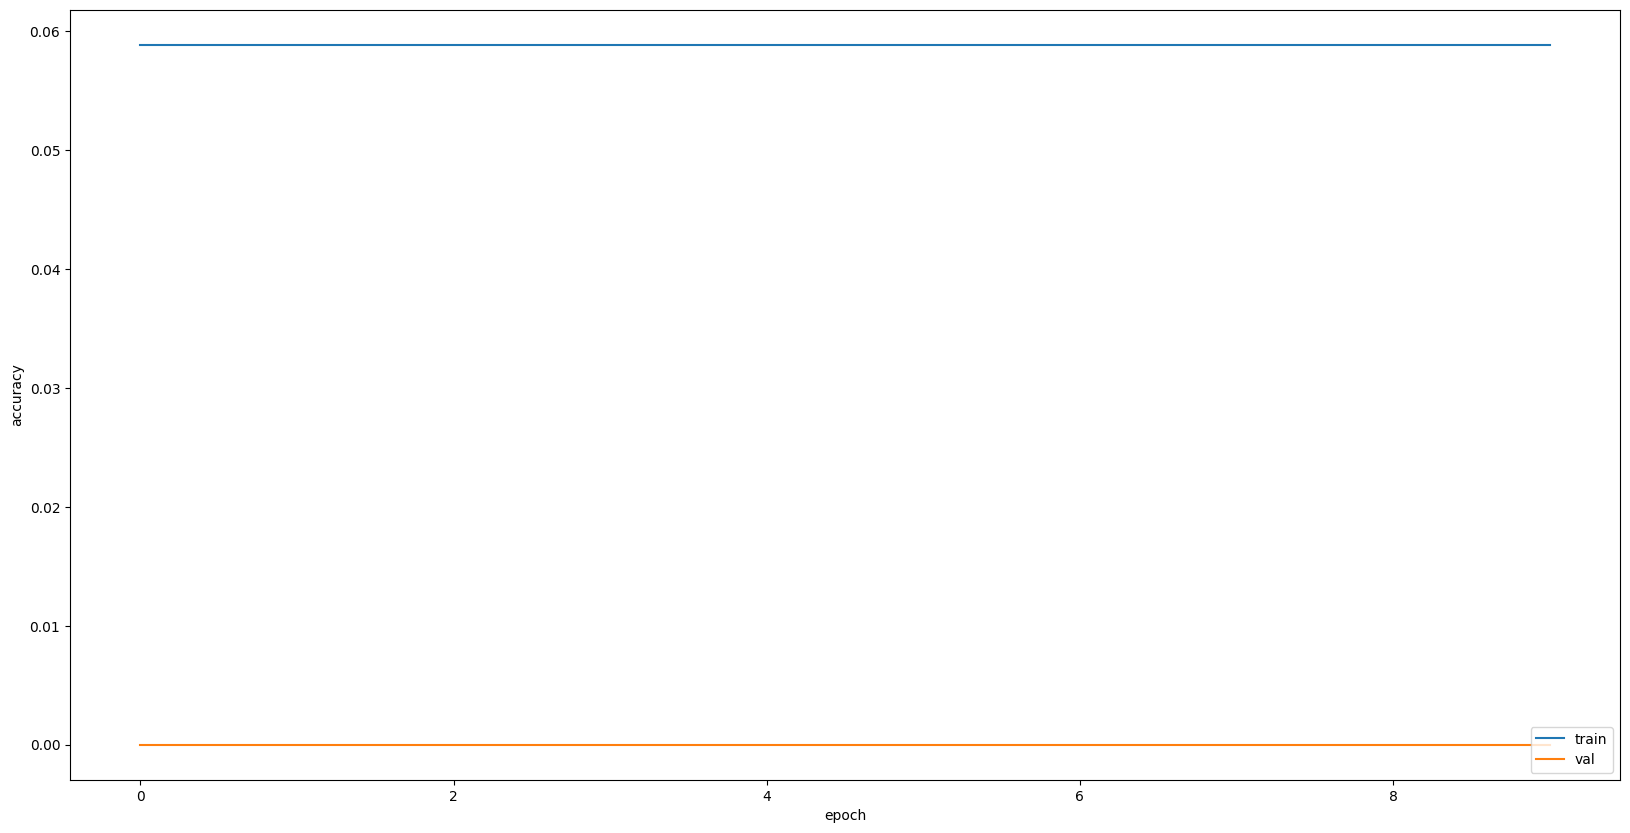

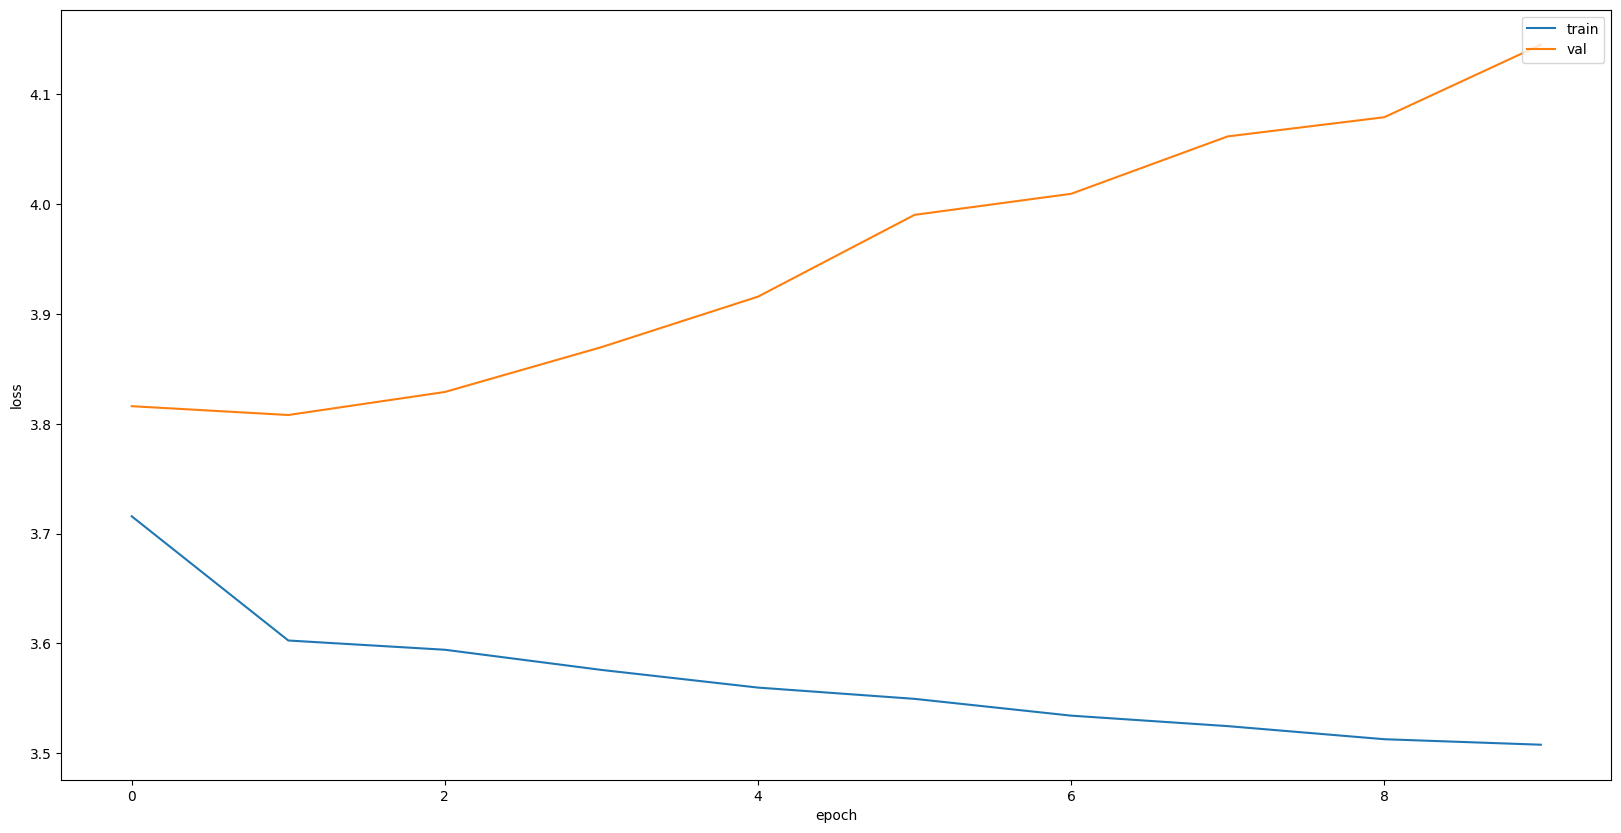

TRAINING SET
Loss: 3.4914028644561768 
Accuracy: 0.05882352963089943

VALIDATION SET
Loss: 4.145291328430176 
Accuracy: 0.0

TEST SET
Loss: 3.9261651039123535 
Accuracy: 0.02500000037252903
7/7 [==============================] - 0s 25ms/step


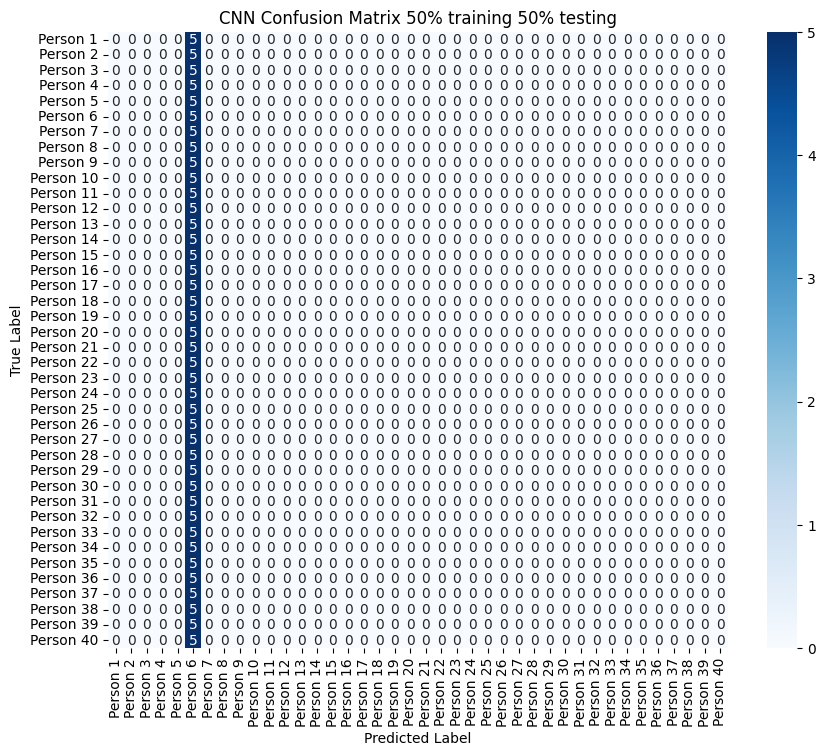



Scenario: 80% training, 20% testing
Epoch 1/10
14/14 [==============================] - 3s 80ms/step - loss: 3.6825 - accuracy: 0.0370 - val_loss: 3.8240 - val_accuracy: 0.0000e+00
Epoch 2/10
 3/14 [=====>........................] - ETA: 0s - loss: 3.5983 - accuracy: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 1s 43ms/step - loss: 3.6463 - accuracy: 0.0370 - val_loss: 3.8410 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 1s 36ms/step - loss: 3.6362 - accuracy: 0.0370 - val_loss: 3.9287 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 1s 40ms/step - loss: 3.6301 - accuracy: 0.0370 - val_loss: 3.9405 - val_accuracy: 0.0357
Epoch 5/10
14/14 [==============================] - 0s 34ms/step - loss: 3.6262 - accuracy: 0.0370 - val_loss: 3.9294 - val_accuracy: 0.0357
Epoch 6/10
14/14 [==============================] - 0s 35ms/step - loss: 3.6193 - accuracy: 0.0370 - val_loss: 4.0247 - val_accuracy: 0.0357
Epoch 7/10
14/14 [==============================] - 0s 33ms/step - loss: 3.6200 - accuracy: 0.0370 - val_loss: 4.0361 - val_accuracy: 0.0357
Epoch 8/10
14/14 [==============================] - 1s 38ms/step - loss: 3.6082 - accuracy: 0.0370 - val_loss: 3.9303 - val_accuracy: 0.0357
Epoch 9/10
14/14

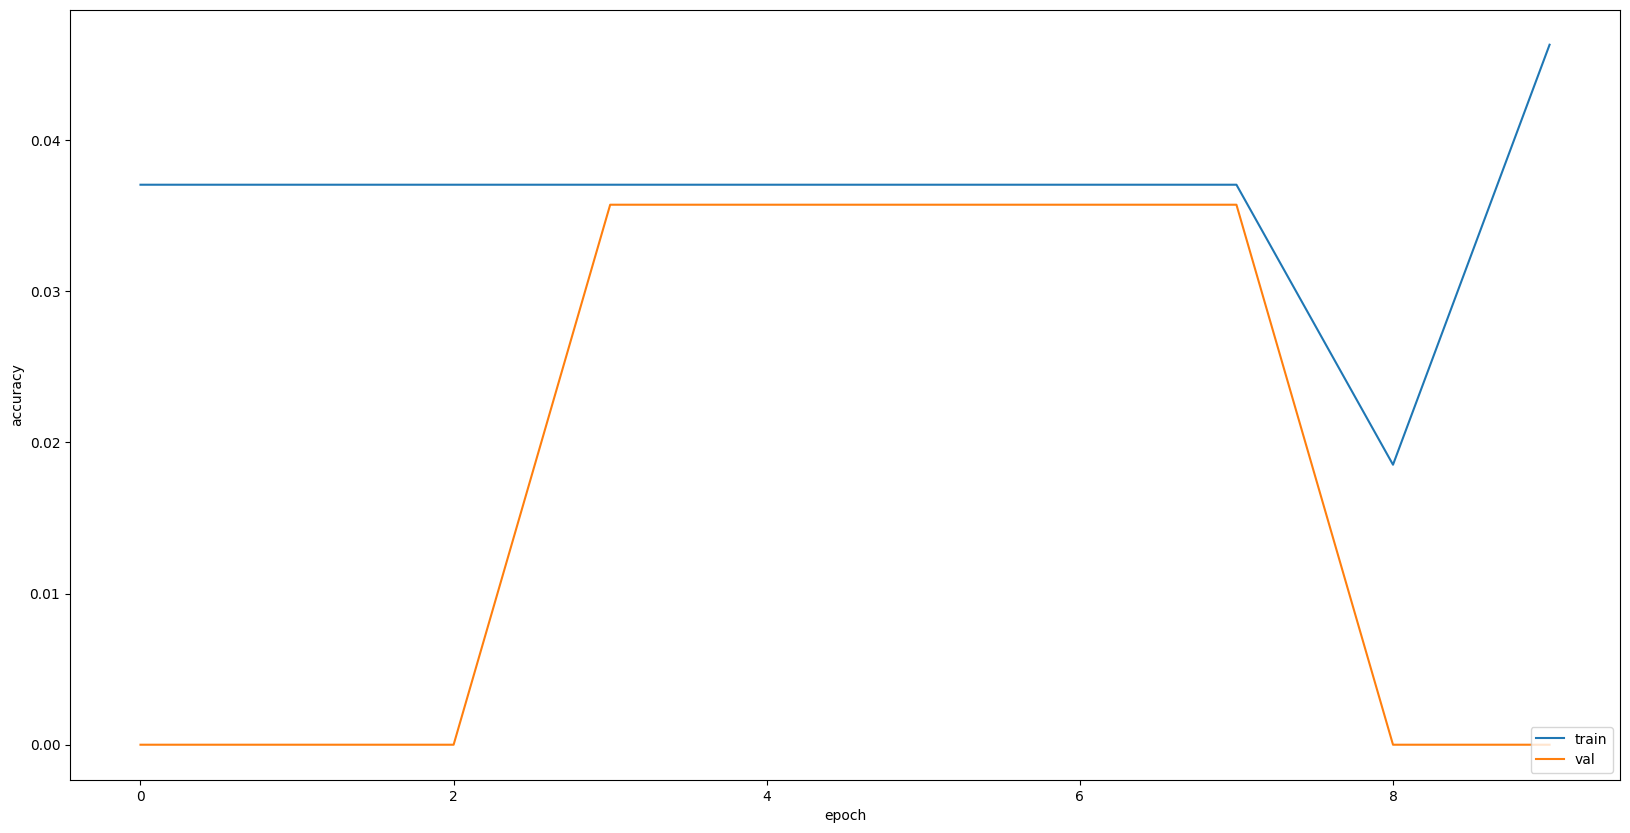

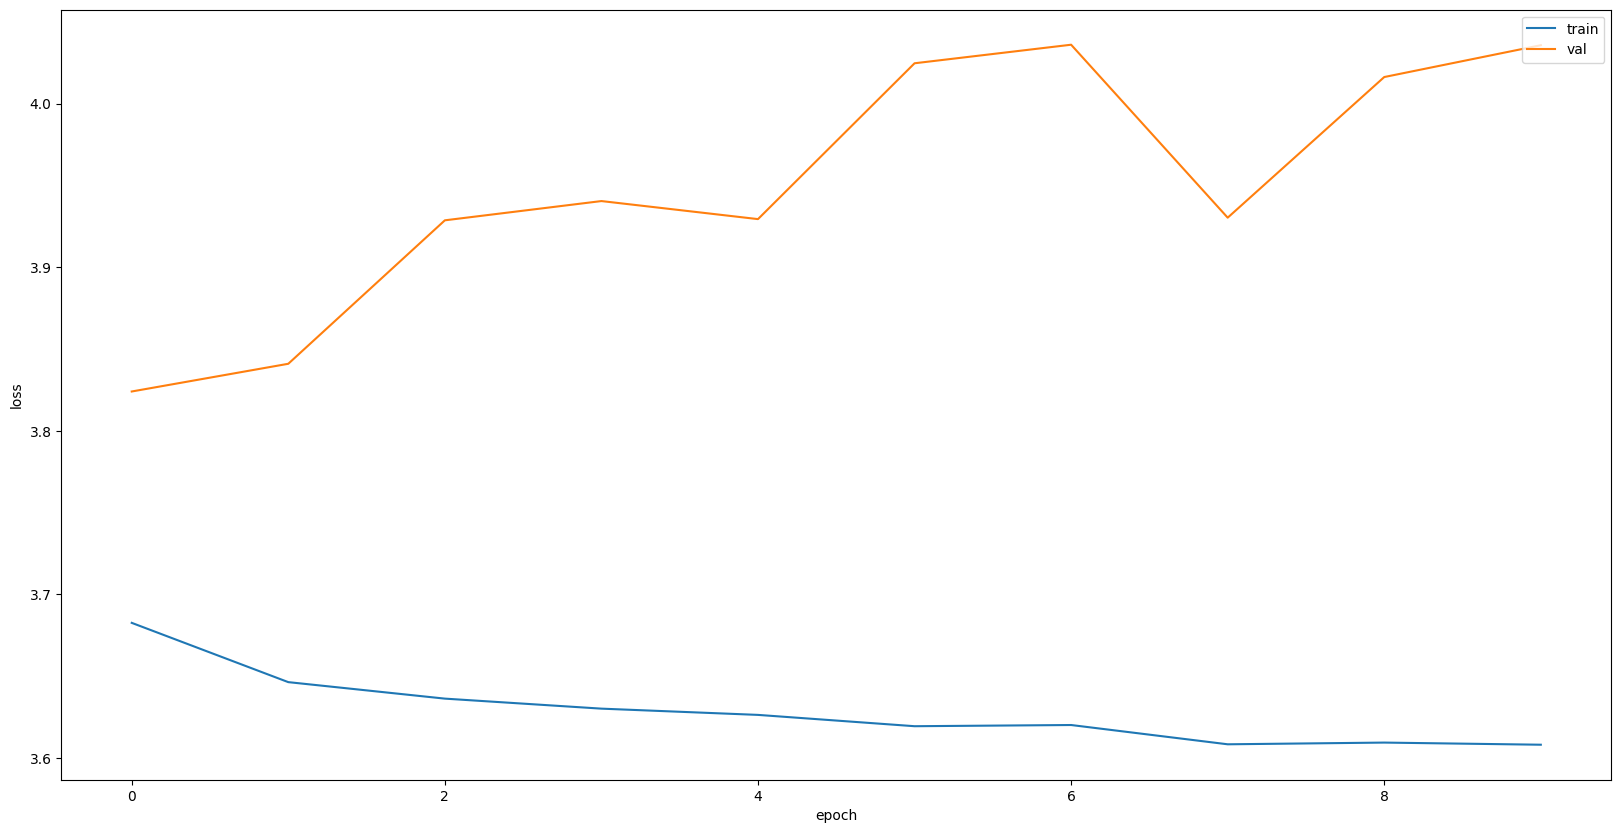

TRAINING SET
Loss: 3.596102714538574 
Accuracy: 0.046296294778585434

VALIDATION SET
Loss: 4.035778522491455 
Accuracy: 0.0

TEST SET
Loss: 3.7867813110351562 
Accuracy: 0.02500000037252903
7/7 [==============================] - 0s 24ms/step


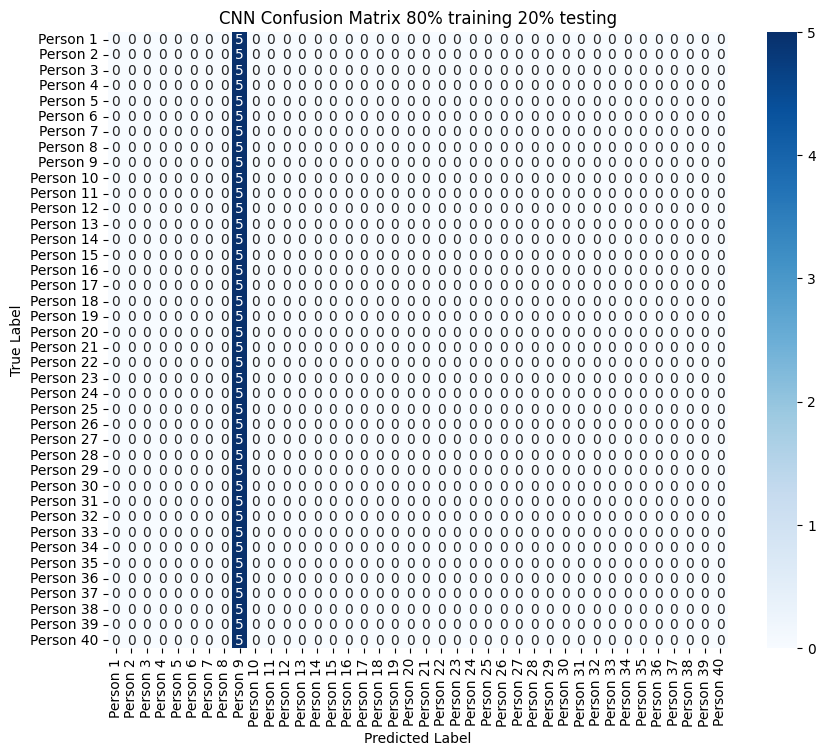



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 60, 60, 6)         156       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 2704)              0         
                                                                 
 dense_30 (Dense)            (None, 120)           

In [ ]:
test_size_list = [0.8, 0.5, 0.2]
original_x_train = x_train.copy()
original_y_train = y_train.copy()

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=N_IDENTITIES, activation='softmax'))

for testSize in test_size_list:
  x_train, y_train = original_x_train.copy(), original_y_train.copy()
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=testSize, random_state=42)
  print(f"Scenario: {int(100 - testSize * 100)}% training, {int(testSize * 100)}% testing")
  CNN_fn()

  y_pred = model.predict(x_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  confusion_mat = confusion_matrix(y_test, y_pred_classes)

  unique_labels = np.unique(faces.target)
  person_names = [f"Person {label + 1}" for label in unique_labels]

  plt.figure(figsize=(10, 8))
  sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
             xticklabels=person_names, yticklabels=person_names)
  plt.title(f"CNN Confusion Matrix {int(100 - testSize * 100)}% training {int(testSize * 100)}% testing")
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()
  print("\n")

print(model.summary(), "\n")

The following is the augmentation for CNN.

In [ ]:
num_classes = 40
learning_rate = 0.001
loss_function = 'categorical_crossentropy'
num_epochs = 50
batch_size = 64

y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

def adjust_brightness(img, factor=0.2):
    """ Custom function to adjust brightness """
    return tf.image.random_brightness(img, max_delta=factor)

def CNN_fn_augmented():
    data_augmentation = tf.keras.Sequential([
      preprocessing.RandomContrast(factor=0.2),
      preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
      preprocessing.RandomCrop(height=60, width=60),
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomRotation(0.1)
    ])
    model2 = tf.keras.models.Sequential([
        data_augmentation,
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model2.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

    history = model2.fit(x=x_train, y=y_train_encoded, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val_encoded), callbacks=[model_save])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)

CNN_fn_augmented()



Epoch 1/50
2/2 [==============================] - 3s 630ms/step - loss: 3.6891 - accuracy: 0.0093 - val_loss: 3.6890 - val_accuracy: 0.0000e+00
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 225ms/step - loss: 3.6874 - accuracy: 0.0370 - val_loss: 3.6915 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 1s 272ms/step - loss: 3.6848 - accuracy: 0.0370 - val_loss: 3.6951 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 225ms/step - loss: 3.6755 - accuracy: 0.0648 - val_loss: 3.7029 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 1s 267ms/step - loss: 3.6718 - accuracy: 0.0463 - val_loss: 3.7195 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 233ms/step - loss: 3.6600 - accuracy: 0.0185 - val_loss: 3.7491 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 1s 272ms/step - loss: 3.6454 - accuracy: 0.0370 - val_loss: 3.7897 - val_accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 1s 239ms/step - loss: 3.6415 - accuracy: 0.0278 - val_loss: 3.8316 - val_accuracy: 0.0000e+00
Epo

# Project 5 Results


**PCA**

---


Evaluation Scenario: 20% training, 80% testing;
PCA Accuracy: 48.50%
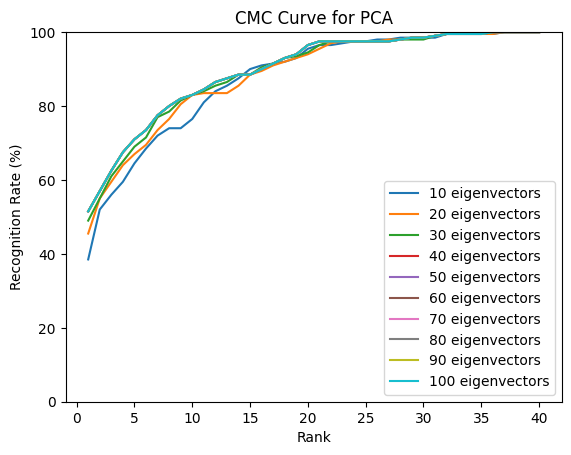
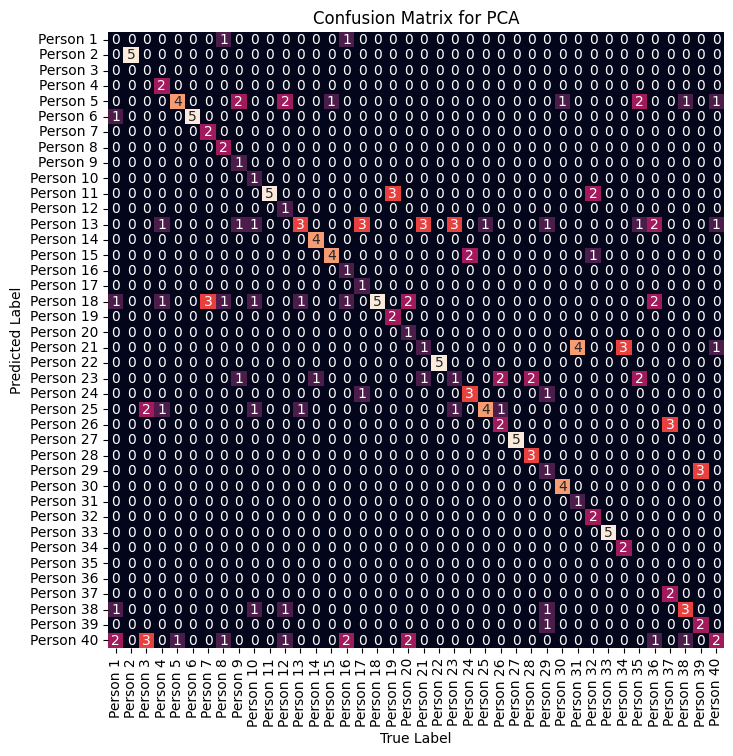

Evaluation Scenario: 50% training, 50% testing; PCA Accuracy: 78.50%
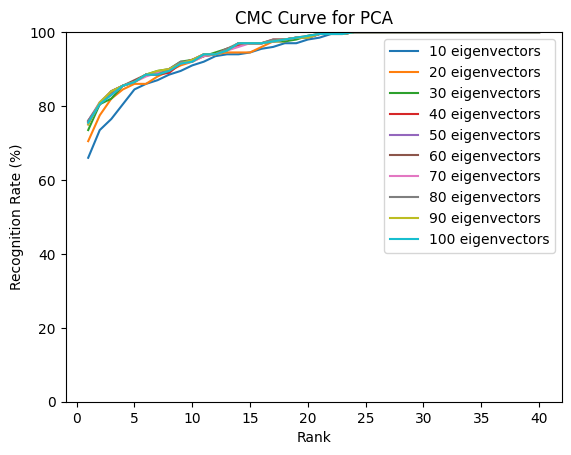
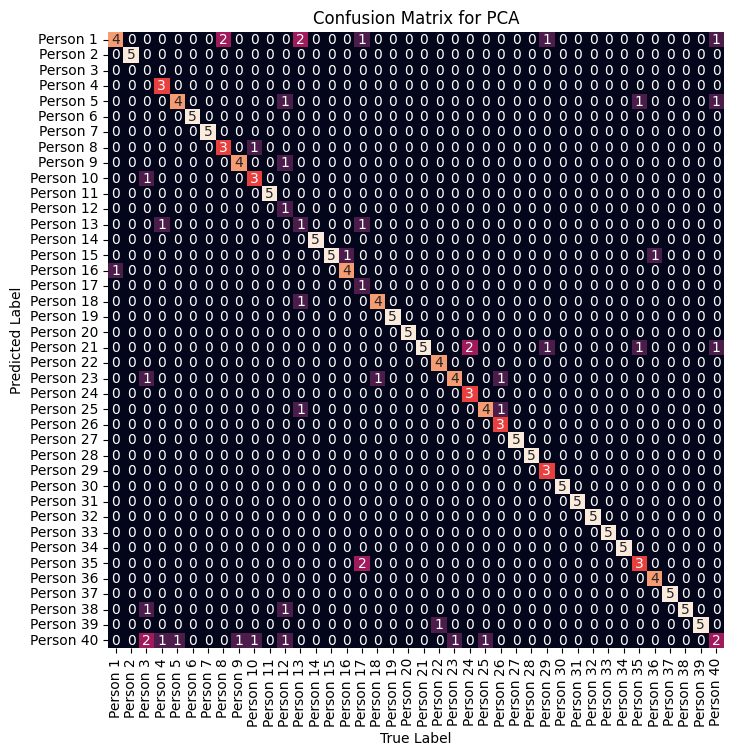

Evaluation Scenario: 80% training, 20% testing; PCA Accuracy: 85.00%
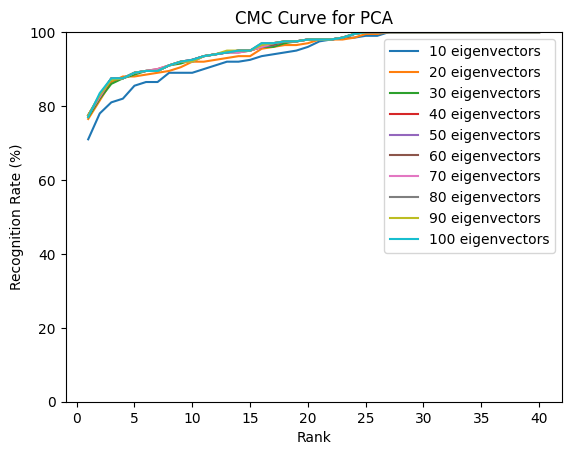
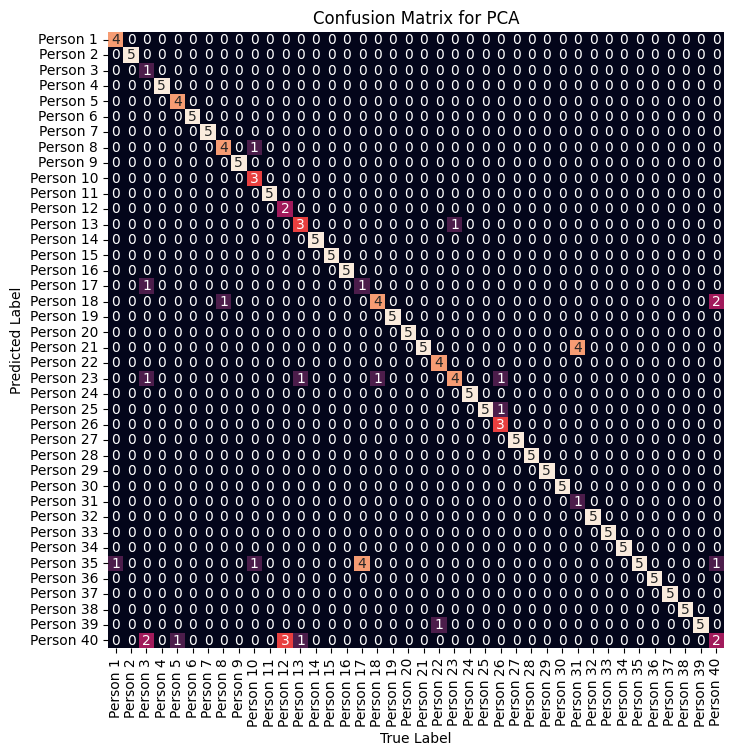

**LDA**


---


Evaluation Scenario: 20% training, 80% testing; LDA Accuracy: 51.50%
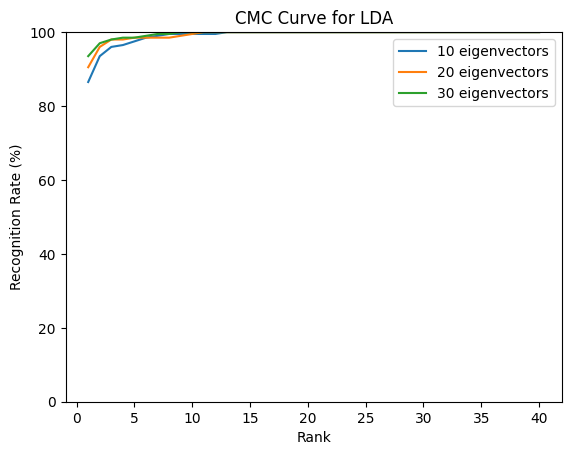
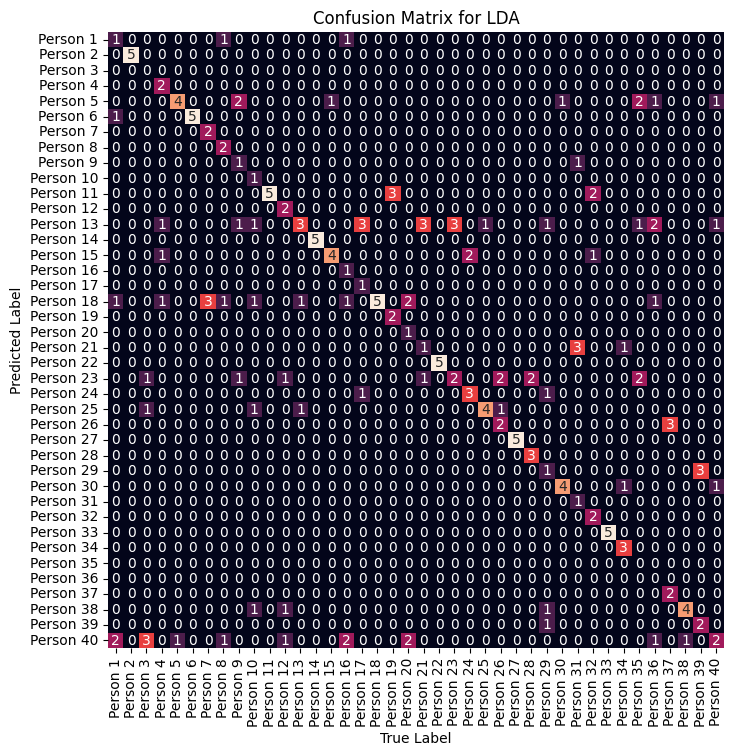

Evaluation Scenario: 50% training, 50% testing; LDA Accuracy: 81.50%
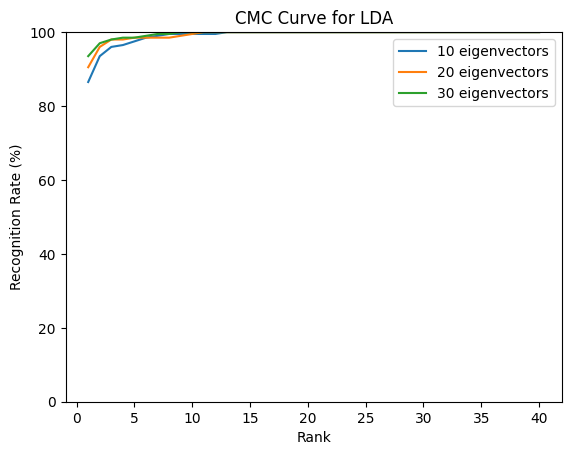
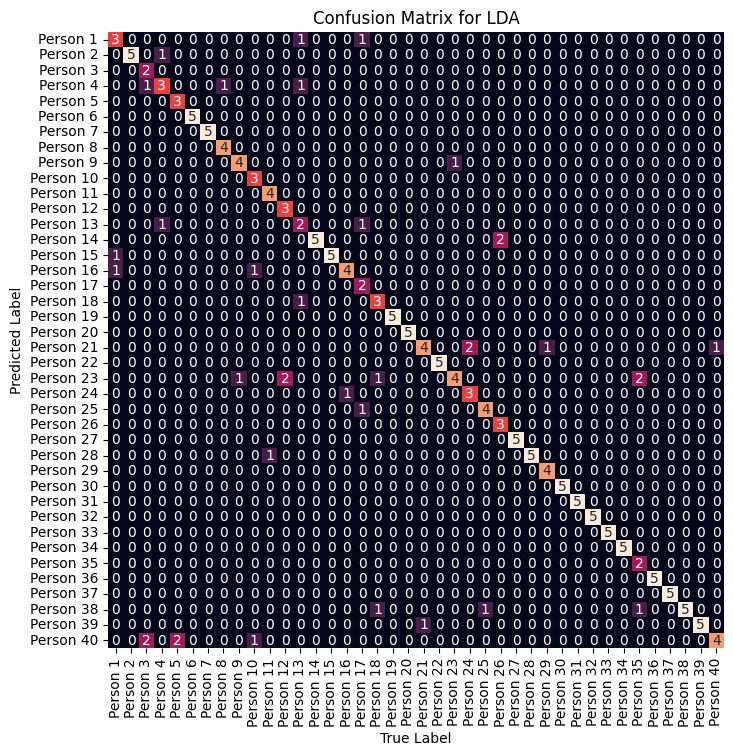

Evaluation Scenario: 80% training, 20% testing; LDA Accuracy: 88.00%
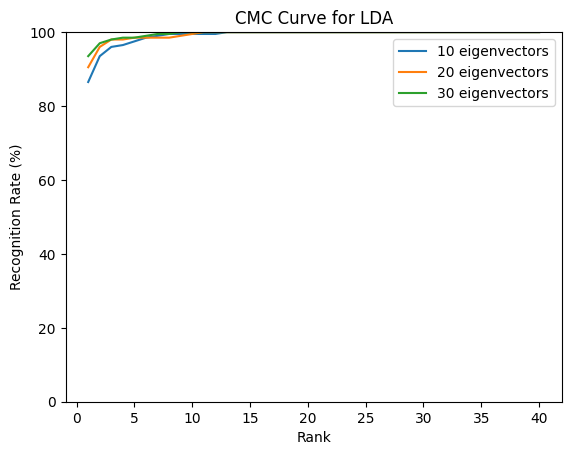
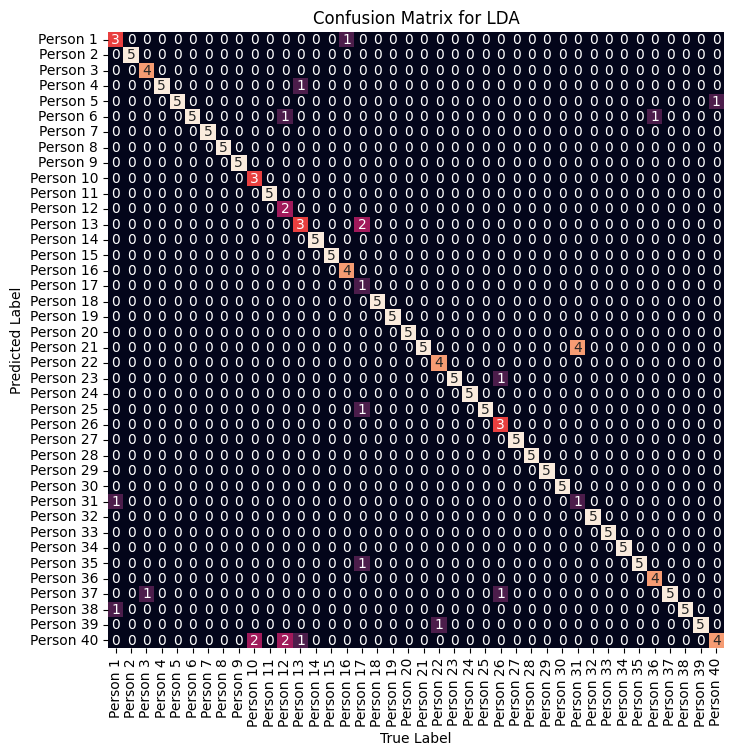

**SVM**


---


Evaluation Scenario: 20% training, 80% testing; SVM Accuracy: 51.50%
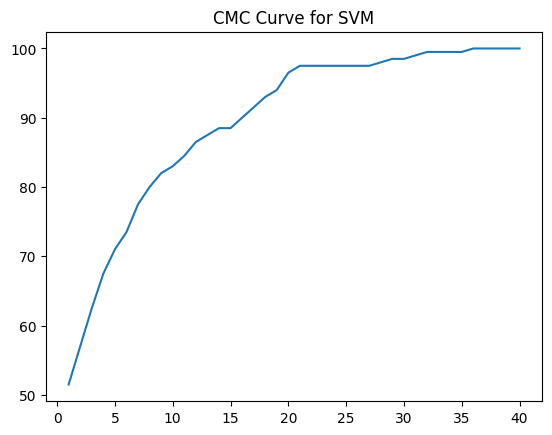
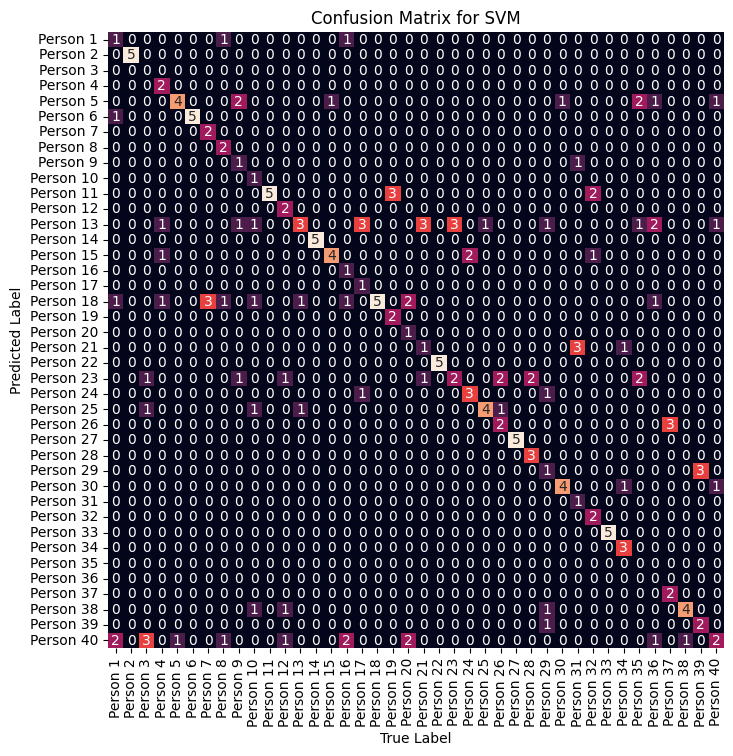

Evaluation Scenario: 50% training, 50% testing; SVM Accuracy: 79.00%
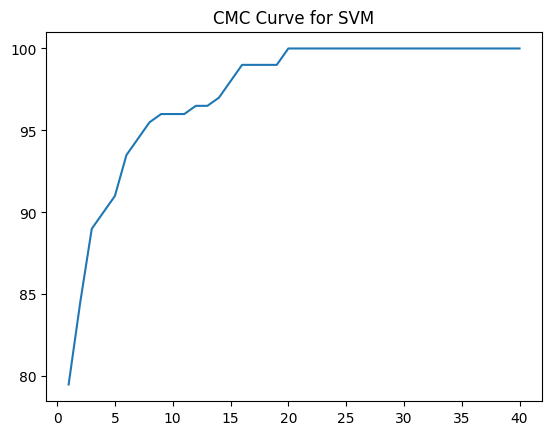
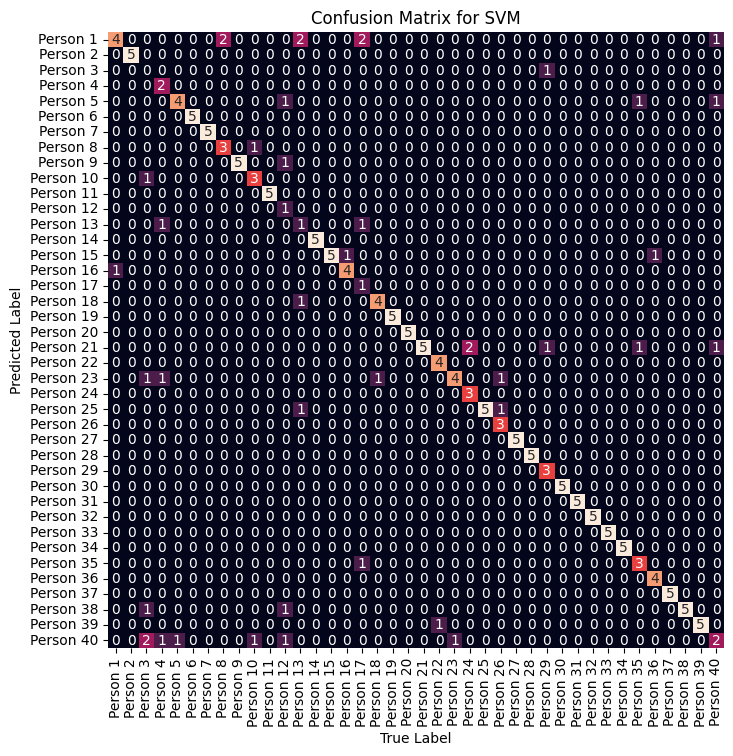

Evaluation Scenario: 80% training, 20% testing; SVM Accuracy: 85.00%
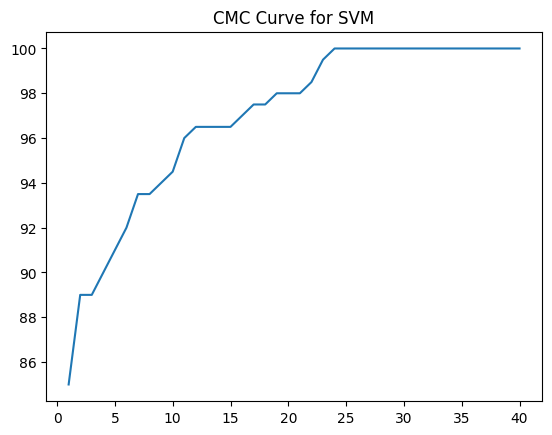
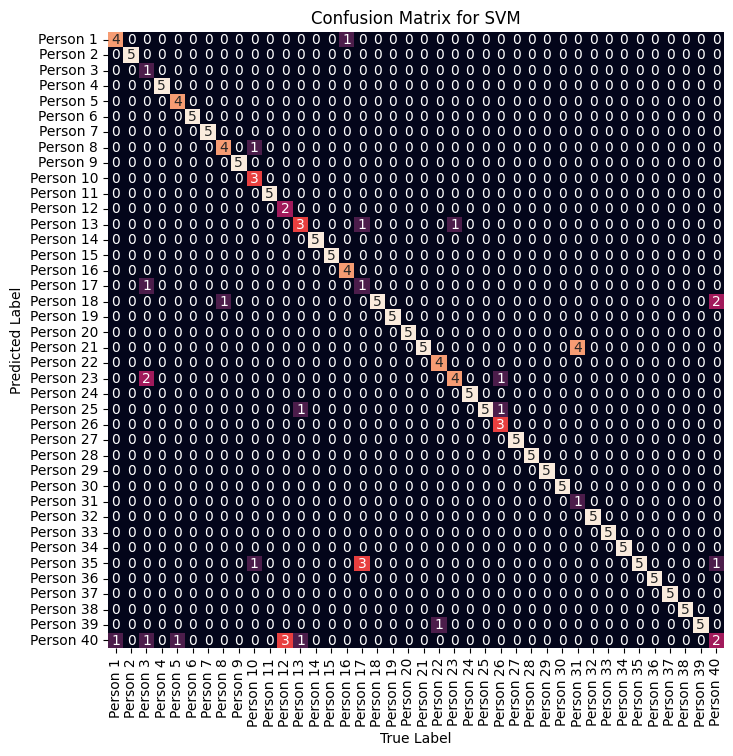

# Report your results

Check these amazing plots I have below!



---


Evaluation Scenario: 20% training, 80% testing<br>
Here are screenshots of us running it (0/1000 to 1000/1000):
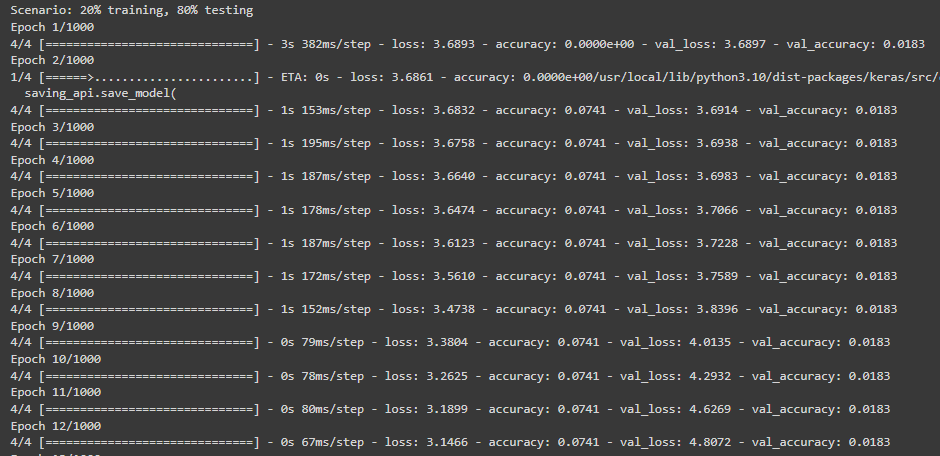
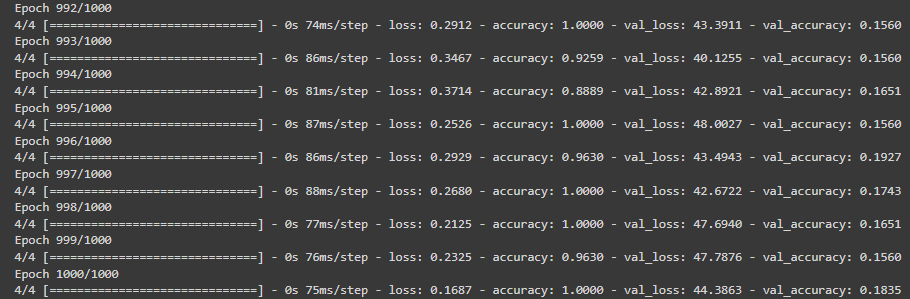
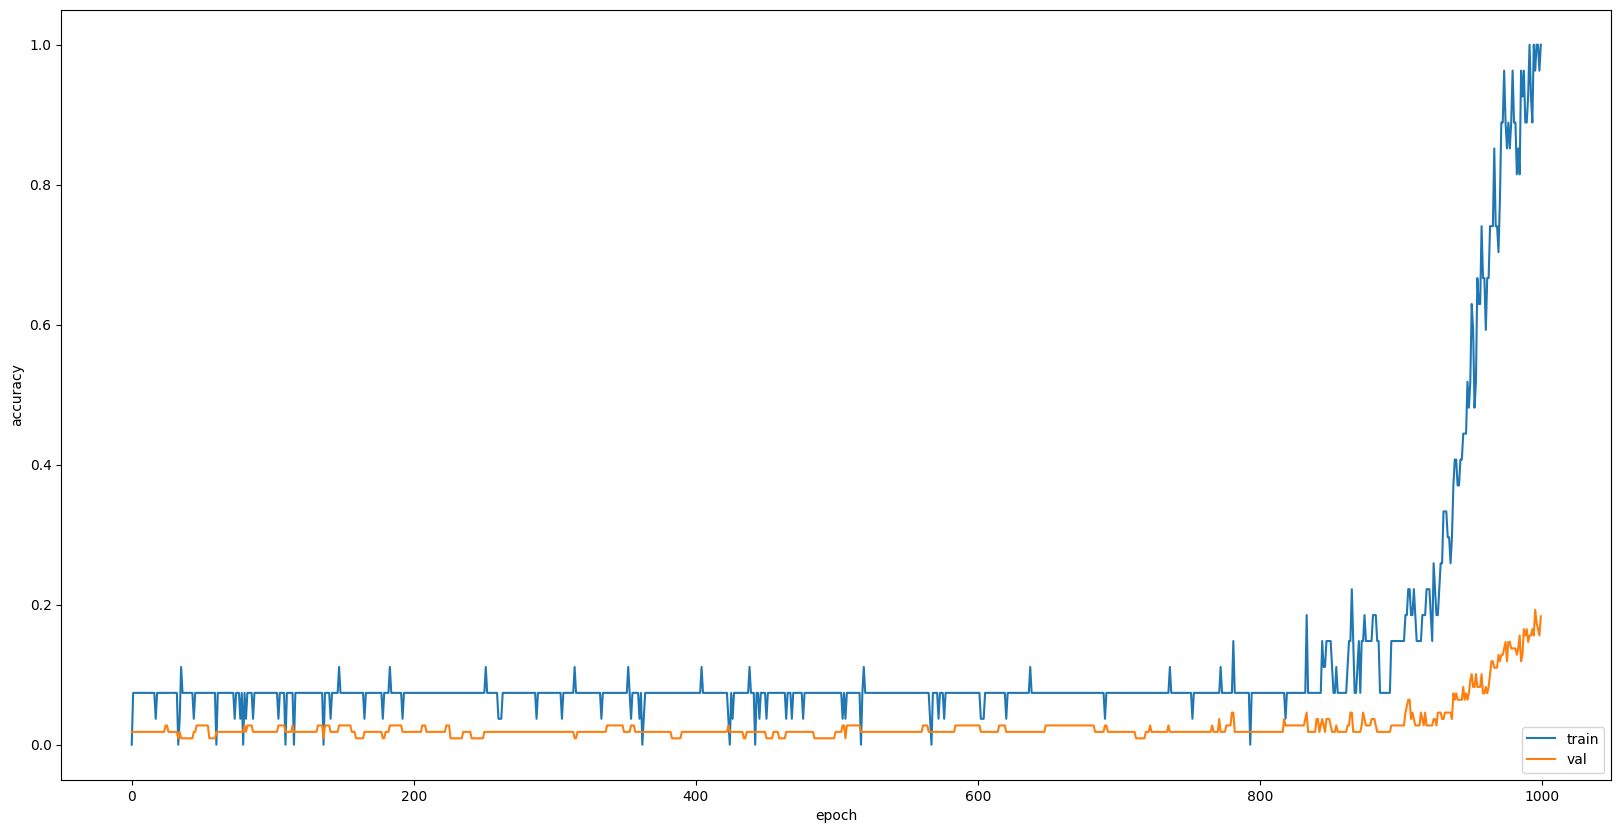
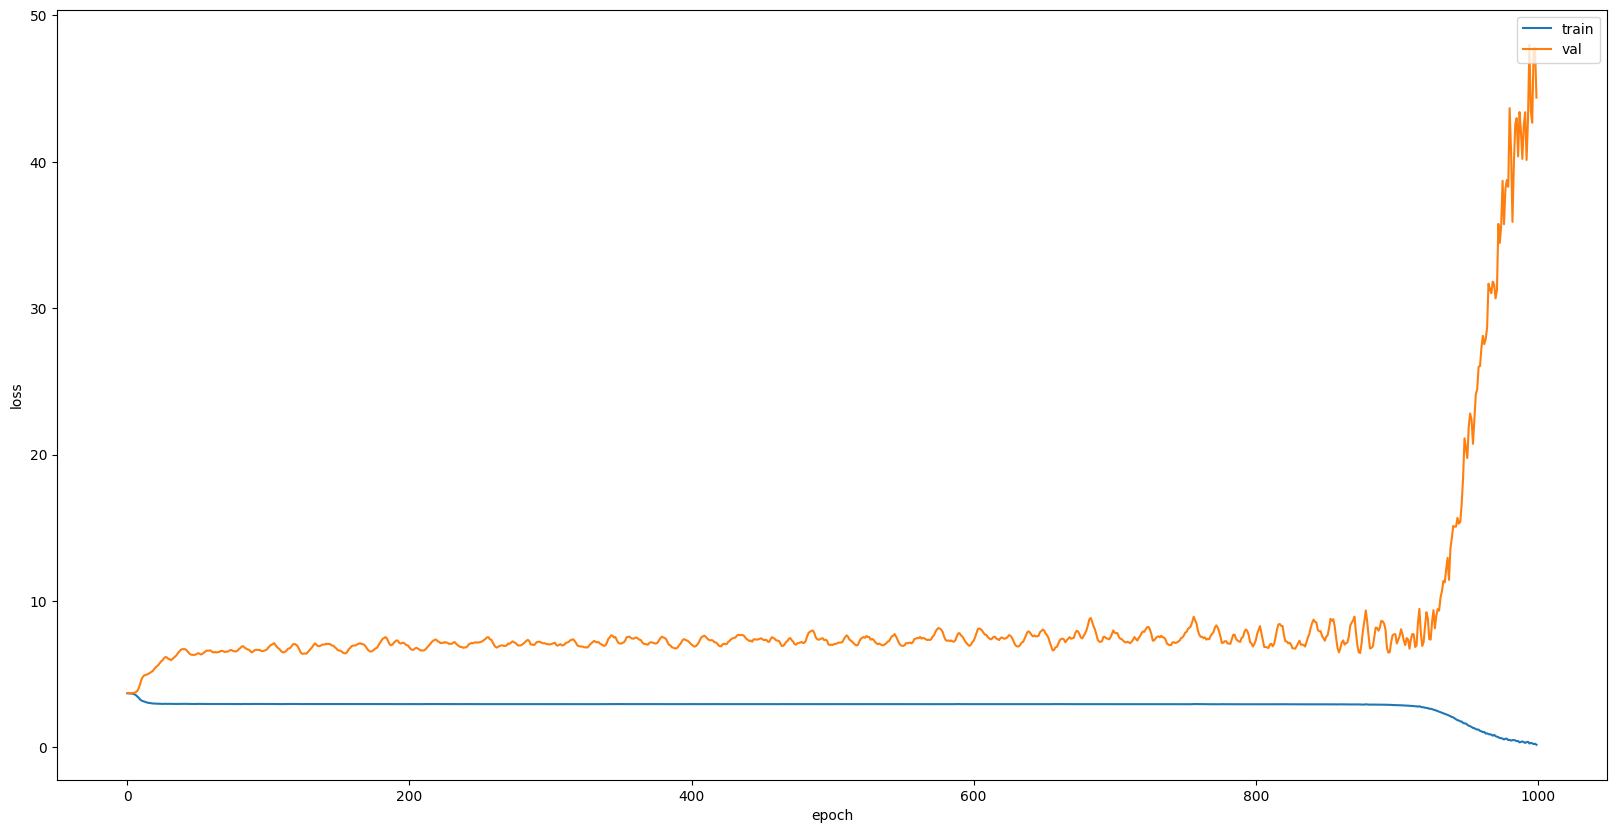
TRAINING SET<br>
Loss: 0.24572886526584625 <br>
Accuracy: 0.8888888955116272<br>
<br>
VALIDATION SET<br>
Loss: 44.38631057739258 <br>
Accuracy: 0.1834862381219864<br>
<br>
TEST SET<br>
Loss: 40.90612030029297 <br>
Accuracy: 0.15000000596046448<br>



---
Evaluation Scenario: 50% training, 50% testing<br>
Here are screenshots of us running it (starting from 0/1000):
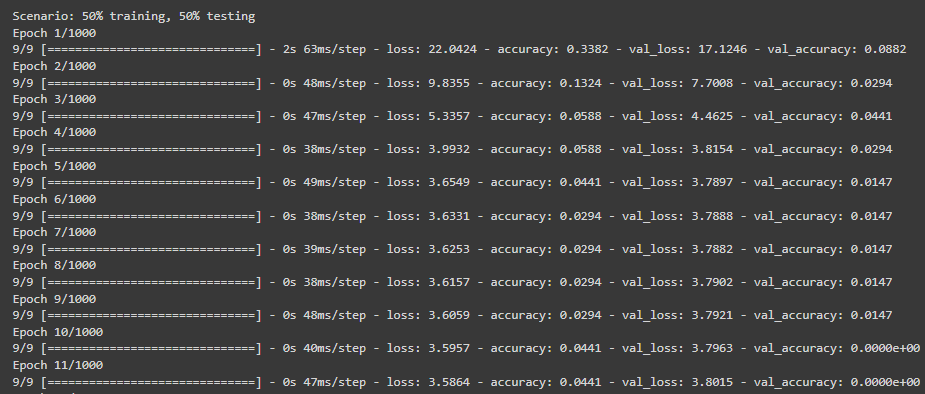
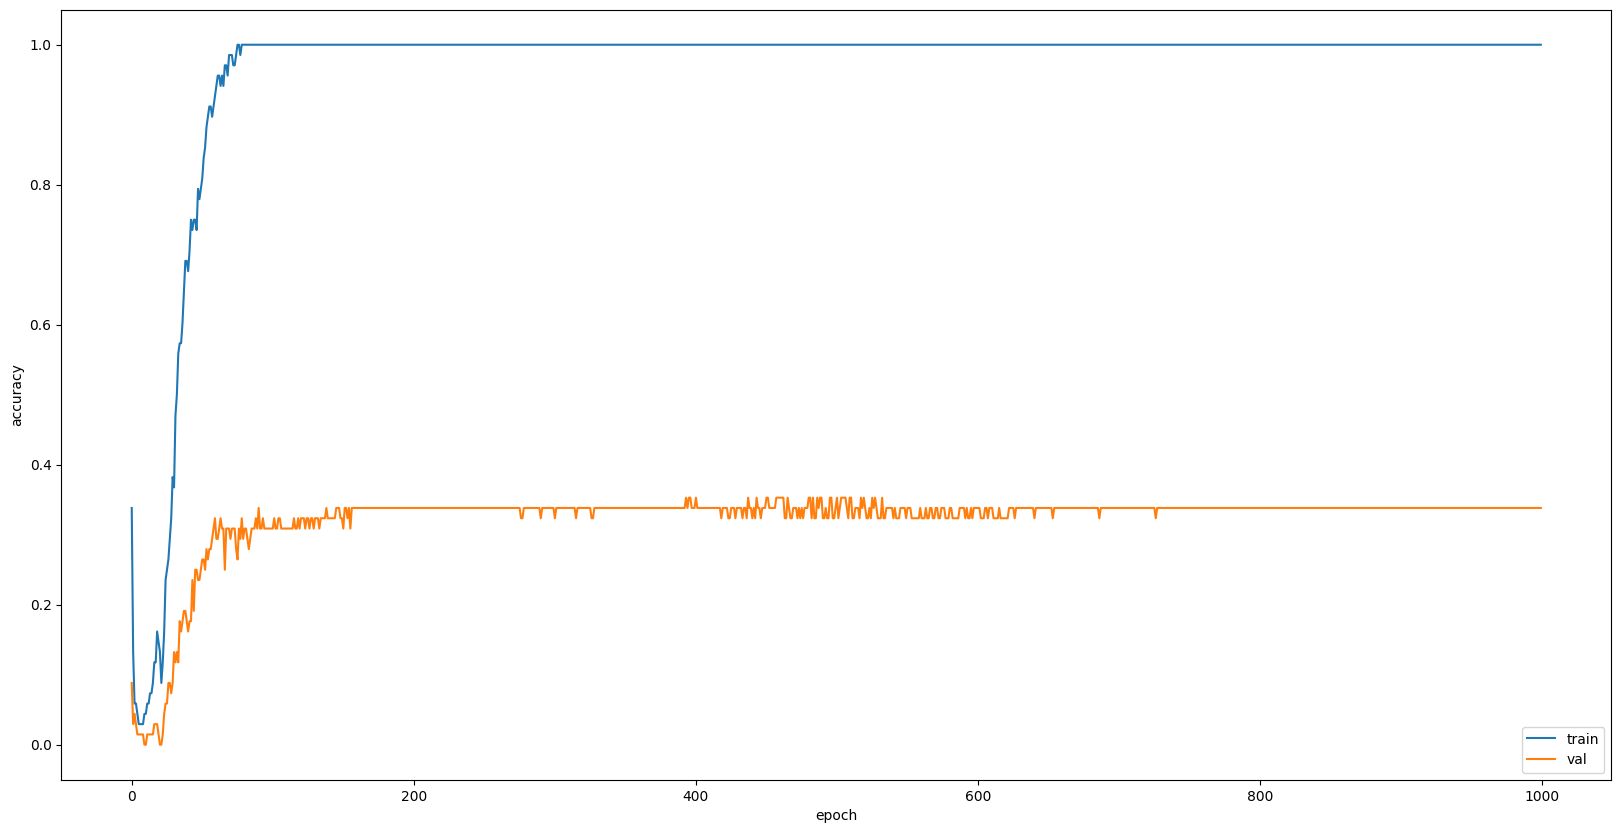
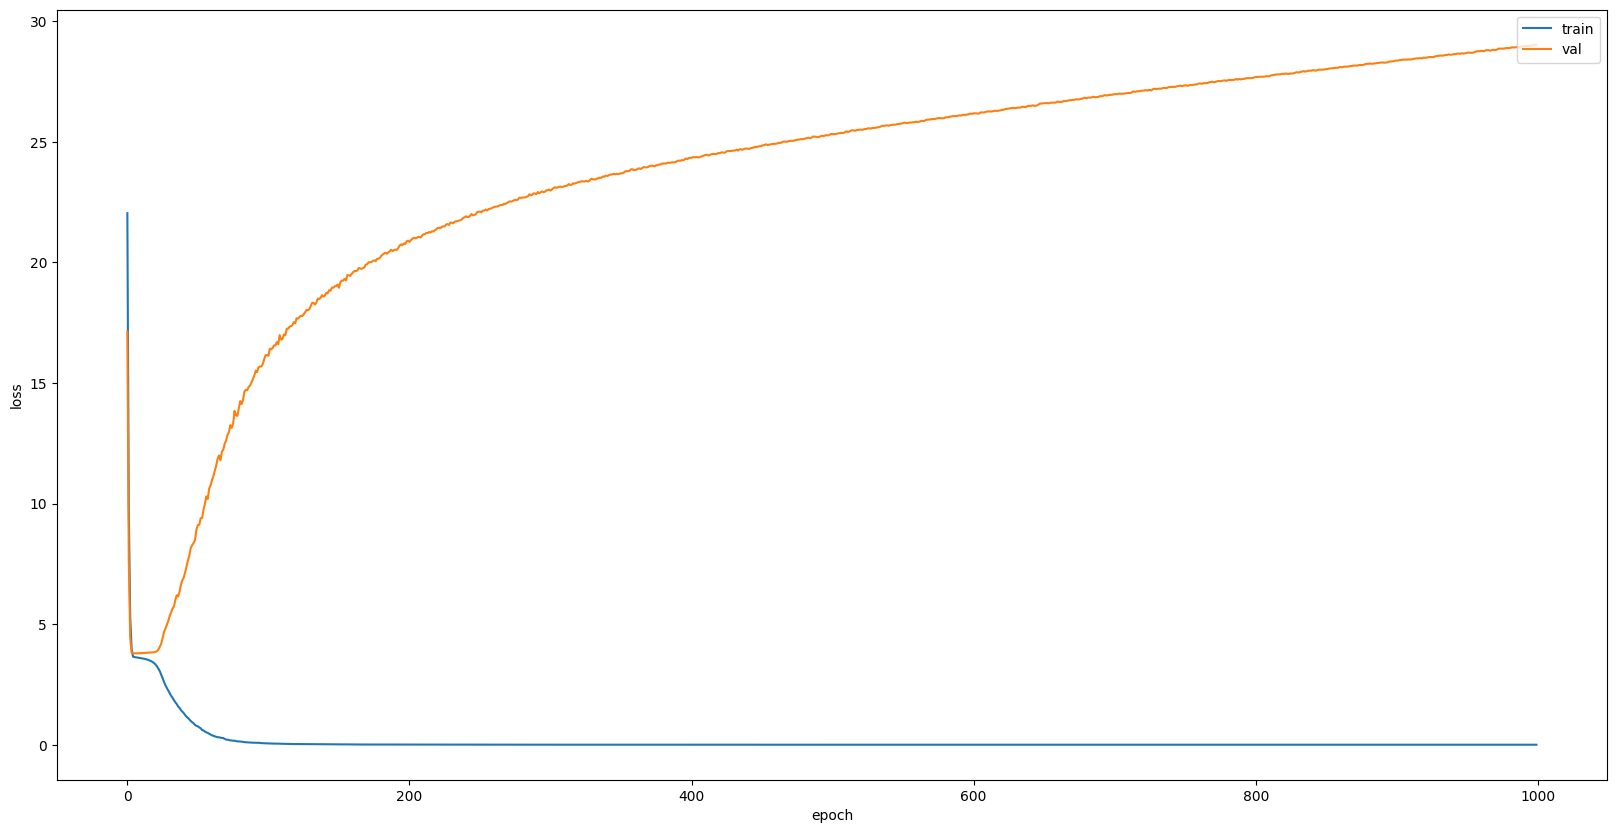
TRAINING SET <br>
Loss: 1.3935022252553608e-05 <br>
Accuracy: 1.0<br>
<br>
VALIDATION SET<br>
Loss: 29.028160095214844 <br>
Accuracy: 0.3382352888584137<br>
<br>
TEST SET<br>
Loss: 20.795495986938477 <br>
Accuracy: 0.4350000023841858<br>


---
Evaluation Scenario: 80% training, 20% testing<br>
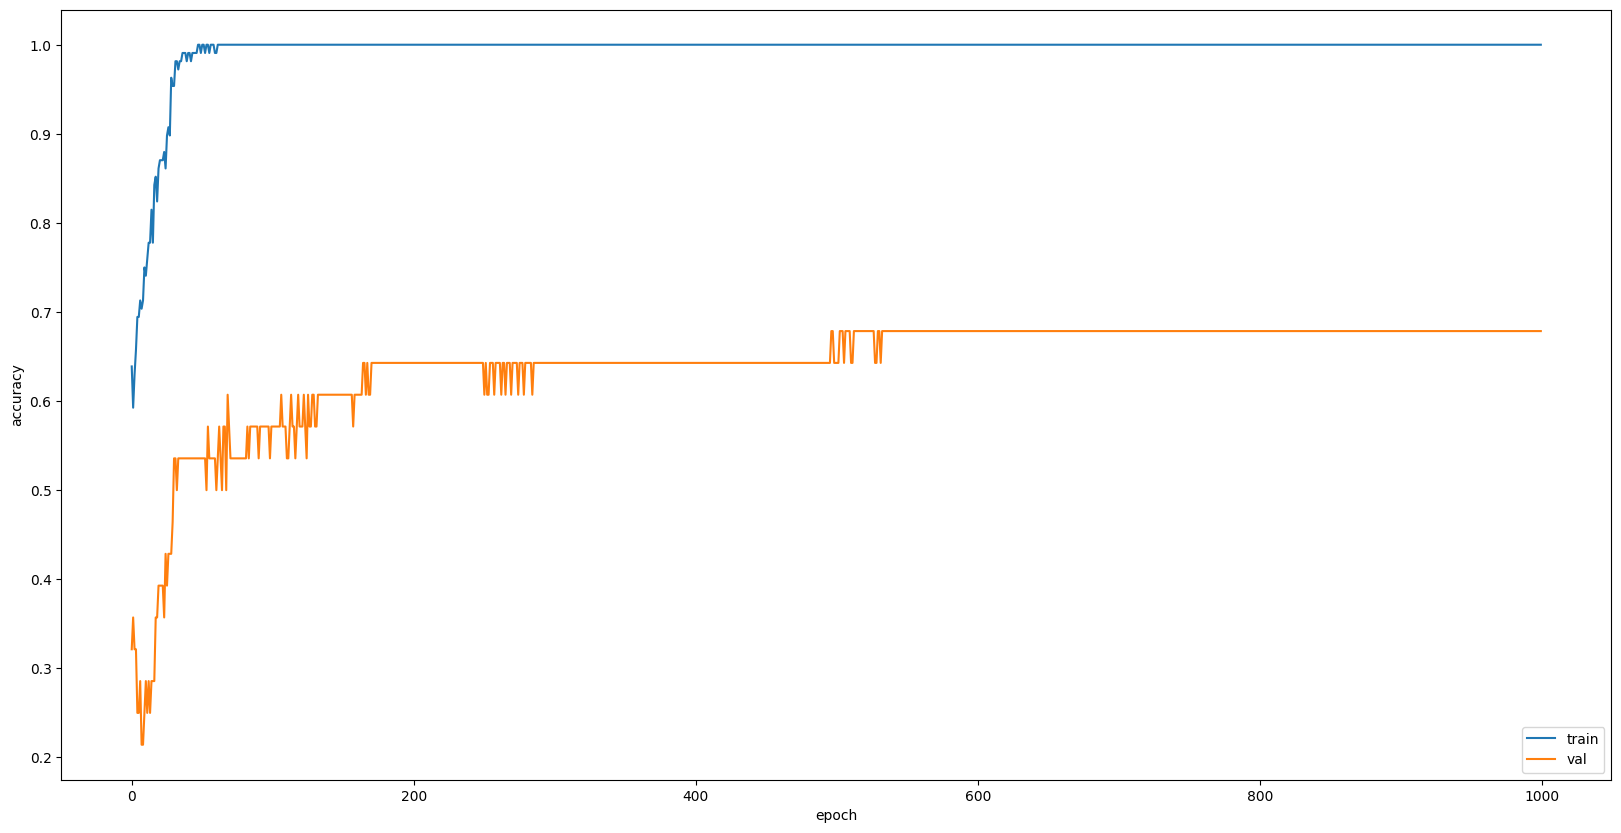
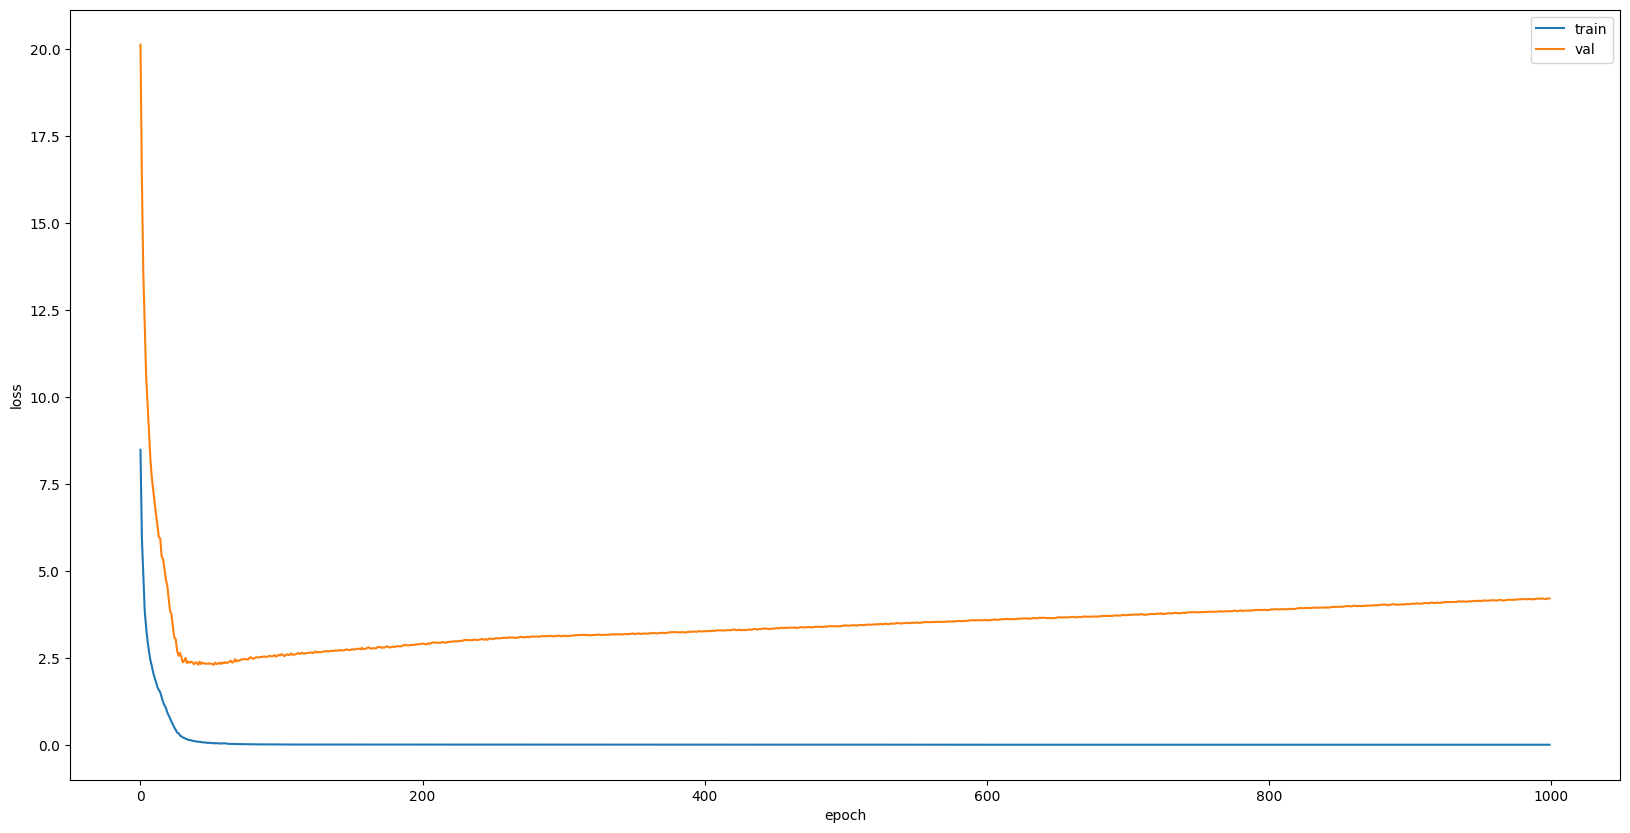
TRAINING SET<br>
Loss: 9.514656653664133e-07 <br>
Accuracy: 1.0<br>
<br>
VALIDATION SET<br>
Loss: 4.206841945648193 <br>
Accuracy: 0.6785714030265808<br>
<br>
TEST SET<br>
Loss: 5.6127142906188965 <br>
Accuracy: 0.6299999952316284<br>

# CNN Discussions

# **1. Is LeNet-5 better than PCA/LDA/SVM?**
Yes, as shown in comparing the results from project 5 and project 6, we can see that using LeNet-5 CNN model we are able to get 100% accuracy given the time while PCA/LDA/SVM are not always going to guarentee 100% accuracy. The more training data we have, the faster the model will be able to hit 100% accuracy in determining faces in this project.

However, if time is a valuable factor, using PCA/LDA/SVM will be better, as it will be faster in exchange for less accuracy.

# **2. Is there a clear difference in performance for different train/test data splits?**

Yes, as shown in project 6's results, we can conclude that more train data the model uses, the faster it will learn and reach 100% accuracy.

When the train data is small (20%), it can take up to thousands of attempts before the model learns in some cases while when the train data is big (80%) the model is able to finish within 200 attempts consistently.

# **3. Does data augmentation improve the results?**

Yes, data augmentation is a common practice to improve results in CNN models. By transforming the inputs of the given images, the model will be able to generalize better. In project 6, we used tensorflow libraries to help us perform data augmentations on the Olivetti face data set.

Data augmentation is essential when the training data is small such as the 20% training 80% testing evaluation scenario. It artificially increases the training size making the model learn a little better.

# IMDB Movie Review Dataset
Description from https://www.tensorflow.org/datasets/catalog/imdb_reviews:
> Large Movie Review Dataset. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.

In [ ]:
import tensorflow_datasets
import numpy as np

In [ ]:
import tensorflow_datasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load dataset

In [ ]:
dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5TFTNL/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5TFTNL/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5TFTNL/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Get subset of the data for training and testing (2000 samples each). Convert Keras dataset to lists of strings and labels.

# Add your baseline

Here is the code for my baseline, along with an explanation of how it works and why it makes sense for this problem.

Epoch 1/10
63/63 - 2s - loss: 0.6910 - accuracy: 0.5635 - val_loss: 0.6872 - val_accuracy: 0.7140 - 2s/epoch - 26ms/step
Epoch 2/10
63/63 - 1s - loss: 0.6737 - accuracy: 0.7530 - val_loss: 0.6662 - val_accuracy: 0.6730 - 713ms/epoch - 11ms/step
Epoch 3/10
63/63 - 1s - loss: 0.6246 - accuracy: 0.8330 - val_loss: 0.6221 - val_accuracy: 0.7130 - 574ms/epoch - 9ms/step
Epoch 4/10
63/63 - 1s - loss: 0.5407 - accuracy: 0.8765 - val_loss: 0.5556 - val_accuracy: 0.7975 - 603ms/epoch - 10ms/step
Epoch 5/10
63/63 - 1s - loss: 0.4353 - accuracy: 0.9200 - val_loss: 0.4935 - val_accuracy: 0.8040 - 590ms/epoch - 9ms/step
Epoch 6/10
63/63 - 1s - loss: 0.3357 - accuracy: 0.9395 - val_loss: 0.4423 - val_accuracy: 0.8165 - 692ms/epoch - 11ms/step
Epoch 7/10
63/63 - 1s - loss: 0.2548 - accuracy: 0.9605 - val_loss: 0.4145 - val_accuracy: 0.8210 - 604ms/epoch - 10ms/step
Epoch 8/10
63/63 - 1s - loss: 0.1943 - accuracy: 0.9705 - val_loss: 0.3958 - val_accuracy: 0.8275 - 589ms/epoch - 9ms/step
Epoch 9/10
63/

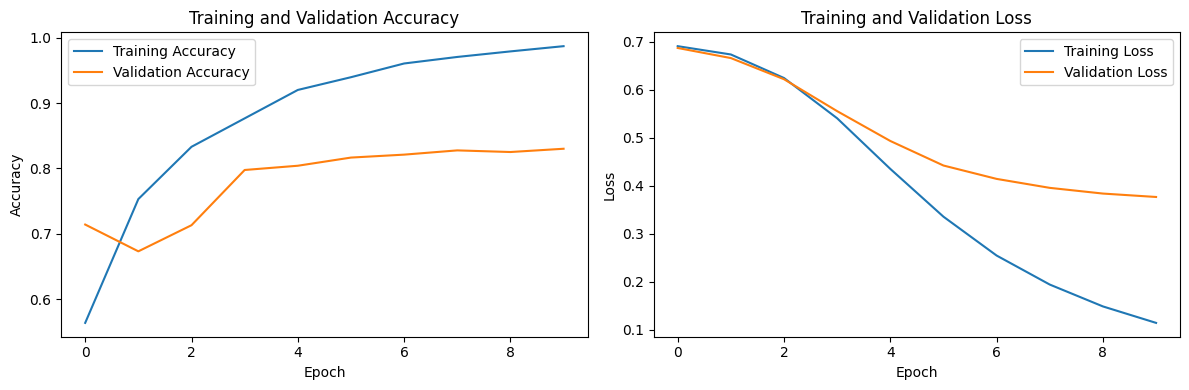

Baseline Model - Test Accuracy: 83.00%


In [ ]:
x_train = []
y_train = []
for sample, label in train_dataset.take(2000):
    x_train.append(sample.numpy())
    y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = []
y_test = []
for sample, label in test_dataset.take(2000):
    x_test.append(sample.numpy())
    y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

max_tokens = 10000
output_sequence_length = 250
vectorize_layer = TextVectorization(max_tokens=max_tokens, output_mode='int', output_sequence_length=output_sequence_length)
vectorize_layer.adapt(x_train)

baseline_model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=max_tokens, output_dim=16, mask_zero=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


baseline_history = baseline_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f'Baseline Model - Test Accuracy: {baseline_accuracy * 100:.2f}%')

# Run the experiments

Here is the code I used to get the results below!

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)
train_texts = ['your', 'list', 'of', 'training', 'texts']
vectorize_layer.adapt(train_texts)

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(max_features, 64, mask_zero=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' abcdefghijklmnopqrstuvwxyz'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    sentence = ' '.join(new_words)
    return sentence

augmented_x_train = []
augmented_y_train = []

for index, sentence in enumerate(x_train):
    decoded_sentence = sentence.decode('utf-8')

    augmented_sentence = synonym_replacement(decoded_sentence, n=1)

    augmented_x_train.append(augmented_sentence.encode('utf-8'))

    augmented_y_train.append(y_train[index])

augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

x_train_augmented = np.concatenate((x_train, augmented_x_train), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y_train), axis=0)

vectorize_layer.adapt(x_train_augmented)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Epoch 1/10
32/32 [==============================] - 8s 179ms/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6948 - val_accuracy: 0.4990
Epoch 2/10
32/32 [==============================] - 4s 138ms/step - loss: 0.6755 - accuracy: 0.6215 - val_loss: 0.6924 - val_accuracy: 0.5085
Epoch 3/10
32/32 [==============================] - 7s 232ms/step - loss: 0.6466 - accuracy: 0.7050 - val_loss: 0.6702 - val_accuracy: 0.6020
Epoch 4/10
32/32 [==============================] - 5s 153ms/step - loss: 0.5945 - accuracy: 0.7325 - val_loss: 0.6633 - val_accuracy: 0.6160
Epoch 5/10
32/32 [==============================] - 6s 194ms/step - loss: 0.5340 - accuracy: 0.7780 - val_loss: 0.6464 - val_accuracy: 0.6585
Epoch 6/10
32/32 [==============================] - 5s 161ms/step - loss: 0.5025 - accuracy: 0.7970 - val_loss: 0.6131 - val_accuracy: 0.6775
Epoch 7/10
32/32 [==============================] - 5s 154ms/step - loss: 0.4037 - accuracy: 0.8710 - val_loss: 0.5869 - val_accuracy: 0.7040
Epoch 

(0.0, 0.7200153328478336)

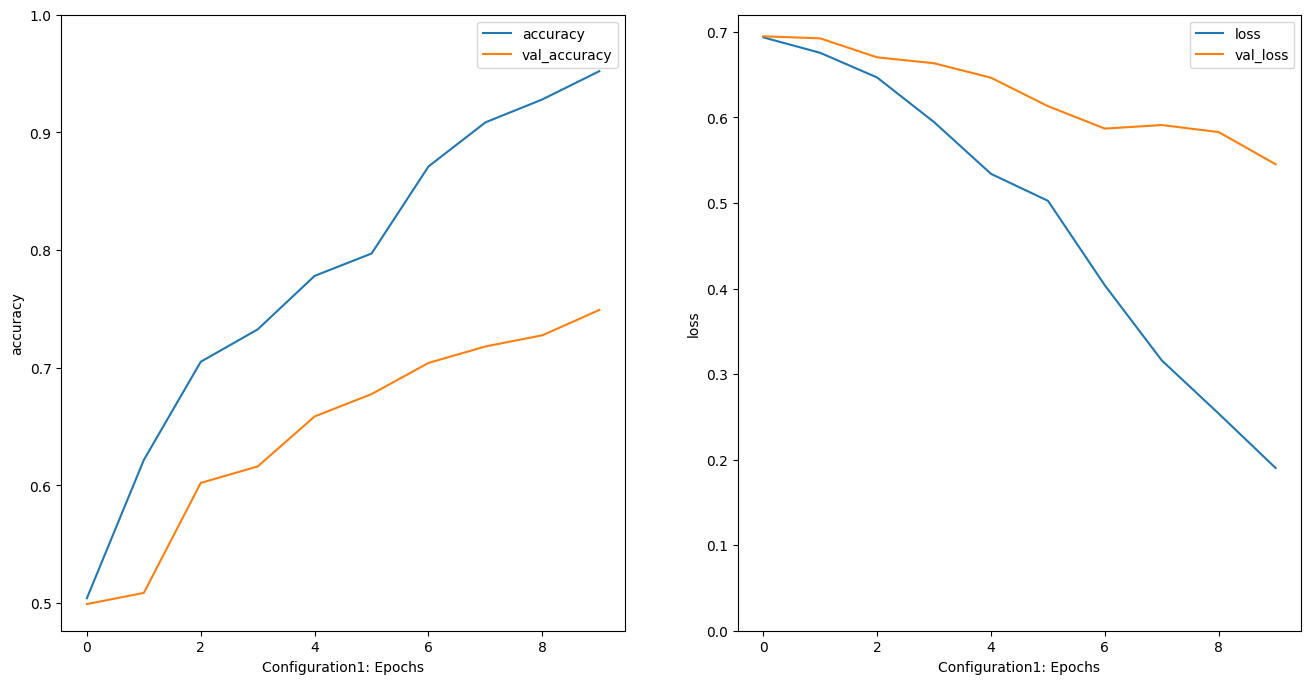

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Configuration1: Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
def sequence_augmentation(sentence, n):
    augmented_sentences = [sentence]

    for _ in range(n):
        decoded_sentence = sentence.decode('utf-8')

        augmented_sentence = synonym_replacement(decoded_sentence, n=1)

        augmented_sentence = augmented_sentence.encode('utf-8')

        augmented_sentences.append(augmented_sentence)

    return augmented_sentences

augmented_x_train = []
augmented_y_train = []

for index, sentence in enumerate(x_train):
    augmented_sentences = sequence_augmentation(sentence, n=1)
    augmented_x_train.extend(augmented_sentences)
    augmented_y_train.extend([y_train[index]] * len(augmented_sentences))

augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

x_train_augmented = np.concatenate((x_train, augmented_x_train), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y_train), axis=0)

vectorize_layer.adapt(x_train_augmented)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(x=x_train_augmented, y=y_train_augmented, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
94/94 [==============================] - 16s 144ms/step - loss: 0.5286 - accuracy: 0.7397 - val_loss: 0.5785 - val_accuracy: 0.6995
Epoch 2/10
94/94 [==============================] - 13s 137ms/step - loss: 0.2882 - accuracy: 0.8985 - val_loss: 0.5937 - val_accuracy: 0.7420
Epoch 3/10
94/94 [==============================] - 13s 136ms/step - loss: 0.1334 - accuracy: 0.9652 - val_loss: 0.6269 - val_accuracy: 0.7460
Epoch 4/10
94/94 [==============================] - 13s 142ms/step - loss: 0.0635 - accuracy: 0.9875 - val_loss: 0.7261 - val_accuracy: 0.7585
Epoch 5/10
94/94 [==============================] - 13s 137ms/step - loss: 0.0302 - accuracy: 0.9950 - val_loss: 0.7522 - val_accuracy: 0.7515
Epoch 6/10
94/94 [==============================] - 14s 148ms/step - loss: 0.0345 - accuracy: 0.9933 - val_loss: 0.8019 - val_accuracy: 0.7400
Epoch 7/10
94/94 [==============================] - 13s 134ms/step - loss: 0.0263 - accuracy: 0.9958 - val_loss: 1.0623 - val_accuracy: 0.7375

In [ ]:
def sequence_augmentation2(sentence, n):
    augmented_sentences = [sentence]

    for _ in range(n):
        decoded_sentence = sentence.decode('utf-8')

        augmented_sentence = synonym_replacement(decoded_sentence, n=1)

        augmented_sentence = augmented_sentence.encode('utf-8')

        augmented_sentences.append(augmented_sentence)

    return augmented_sentences

augmented_x_train = []
augmented_y_train = []

for index, sentence in enumerate(x_train):
    augmented_sentences = sequence_augmentation2(sentence, n=1)
    augmented_x_train.extend(augmented_sentences)
    augmented_y_train.extend([y_train[index]] * len(augmented_sentences))

augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

x_train_augmented = np.concatenate((x_train, augmented_x_train), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y_train), axis=0)

vectorize_layer.adapt(x_train_augmented)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history2 = model.fit(x=x_train_augmented, y=y_train_augmented, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
47/47 [==============================] - 11s 195ms/step - loss: 0.5590 - accuracy: 0.7420 - val_loss: 0.7154 - val_accuracy: 0.6630
Epoch 2/10
47/47 [==============================] - 7s 159ms/step - loss: 0.2908 - accuracy: 0.8867 - val_loss: 0.7042 - val_accuracy: 0.7025
Epoch 3/10
47/47 [==============================] - 9s 181ms/step - loss: 0.1475 - accuracy: 0.9552 - val_loss: 0.7542 - val_accuracy: 0.7135
Epoch 4/10
47/47 [==============================] - 12s 268ms/step - loss: 0.0673 - accuracy: 0.9872 - val_loss: 0.7890 - val_accuracy: 0.7115
Epoch 5/10
47/47 [==============================] - 7s 153ms/step - loss: 0.0337 - accuracy: 0.9947 - val_loss: 0.9060 - val_accuracy: 0.7240
Epoch 6/10
47/47 [==============================] - 9s 188ms/step - loss: 0.0181 - accuracy: 0.9977 - val_loss: 1.0214 - val_accuracy: 0.7240
Epoch 7/10
47/47 [==============================] - 8s 178ms/step - loss: 0.0098 - accuracy: 0.9992 - val_loss: 0.9986 - val_accuracy: 0.7340
Epoc

In [ ]:
def sequence_augmentation3(sentence, n):
    augmented_sentences = [sentence]

    for _ in range(n):
        decoded_sentence = sentence.decode('utf-8')

        augmented_sentence = synonym_replacement(decoded_sentence, n=1)

        augmented_sentence = augmented_sentence.encode('utf-8')

        augmented_sentences.append(augmented_sentence)

    return augmented_sentences

augmented_x_train = []
augmented_y_train = []

for index, sentence in enumerate(x_train):
    augmented_sentences = sequence_augmentation3(sentence, n=1)
    augmented_x_train.extend(augmented_sentences)
    augmented_y_train.extend([y_train[index]] * len(augmented_sentences))

augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

x_train_augmented = np.concatenate((x_train, augmented_x_train), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y_train), axis=0)

vectorize_layer.adapt(x_train_augmented)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-2), metrics=['accuracy'])
history3 = model.fit(x=x_train_augmented, y=y_train_augmented, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
24/24 [==============================] - 9s 308ms/step - loss: 0.7592 - accuracy: 0.5402 - val_loss: 0.7097 - val_accuracy: 0.4970
Epoch 2/10
24/24 [==============================] - 6s 235ms/step - loss: 0.5817 - accuracy: 0.6935 - val_loss: 0.7337 - val_accuracy: 0.5295
Epoch 3/10
24/24 [==============================] - 7s 275ms/step - loss: 0.3626 - accuracy: 0.8242 - val_loss: 0.9828 - val_accuracy: 0.5470
Epoch 4/10
24/24 [==============================] - 6s 251ms/step - loss: 0.1810 - accuracy: 0.9232 - val_loss: 1.3148 - val_accuracy: 0.5325
Epoch 5/10
24/24 [==============================] - 6s 233ms/step - loss: 0.0581 - accuracy: 0.9813 - val_loss: 1.7420 - val_accuracy: 0.5405
Epoch 6/10
24/24 [==============================] - 7s 290ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 2.1849 - val_accuracy: 0.5405
Epoch 7/10
24/24 [==============================] - 6s 231ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 2.3938 - val_accuracy: 0.5365
Epoch 

(0.0, 2.808842271087633)

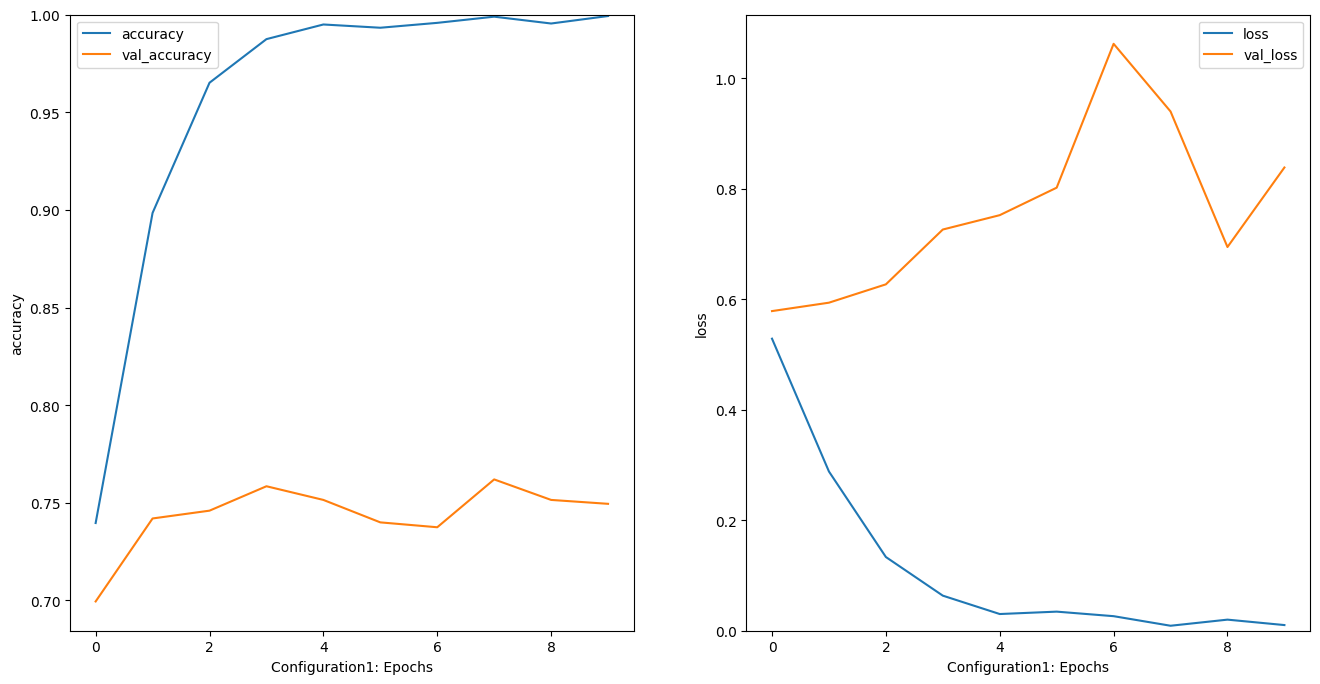

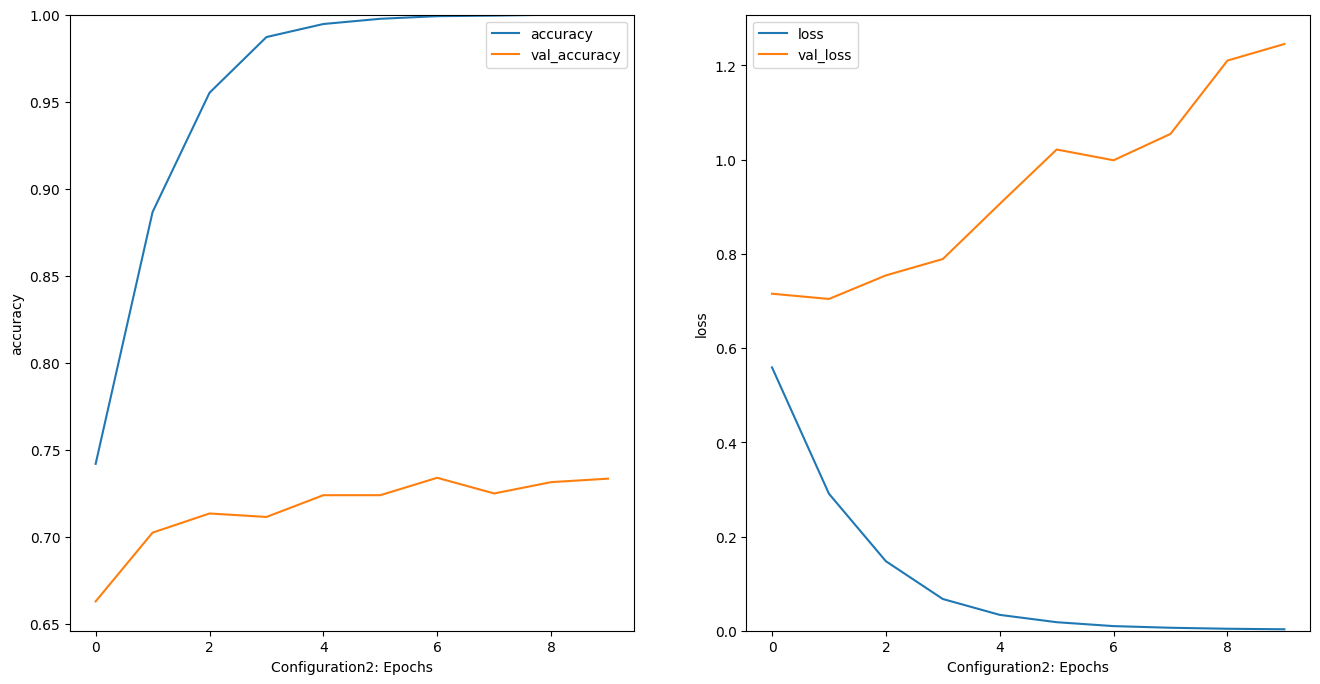

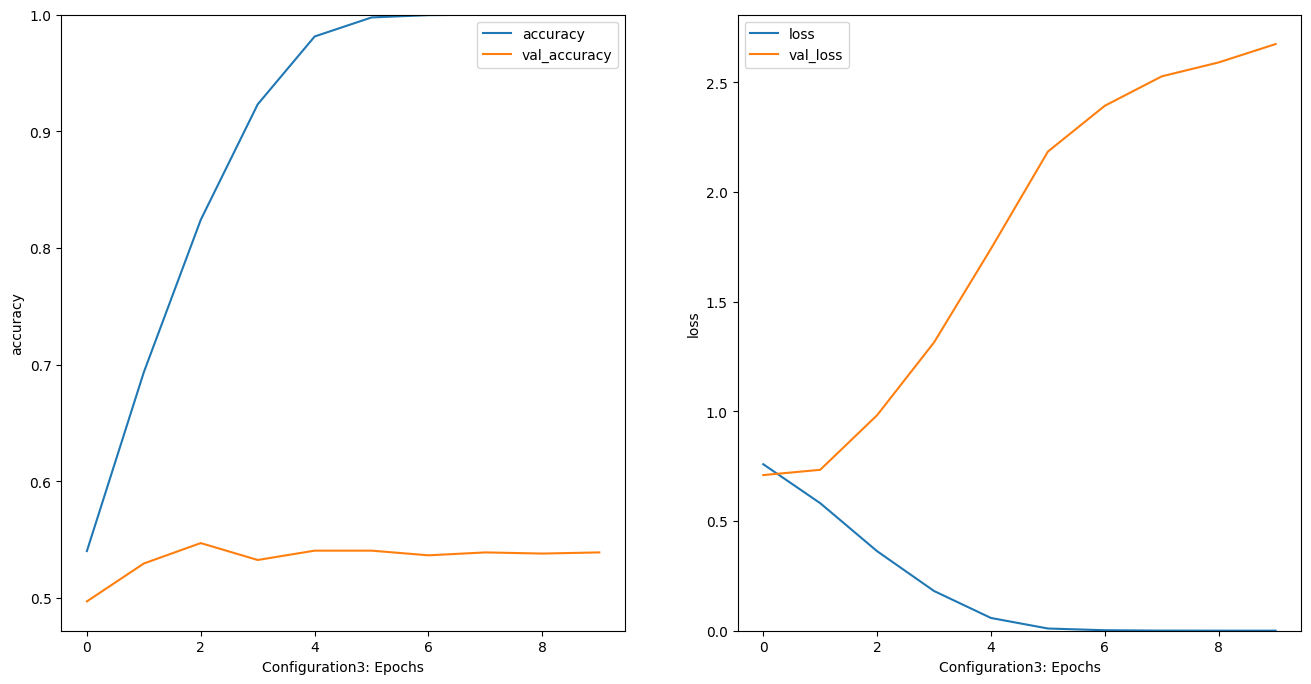

In [ ]:
# plot the graphs for RNN
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Configuration1: Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)


def plot_graphs2(history, metric):
  plt.plot(history2.history[metric])
  plt.plot(history2.history['val_'+metric], '')
  plt.xlabel("Configuration2: Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs2(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs2(history, 'loss')
plt.ylim(0, None)


def plot_graphs3(history, metric):
  plt.plot(history3.history[metric])
  plt.plot(history3.history['val_'+metric], '')
  plt.xlabel("Configuration3: Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs3(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs3(history, 'loss')
plt.ylim(0, None)

63/63 [==============================] - 2s 34ms/step


Text(0.5, 1.0, 'Confusion Matrix')

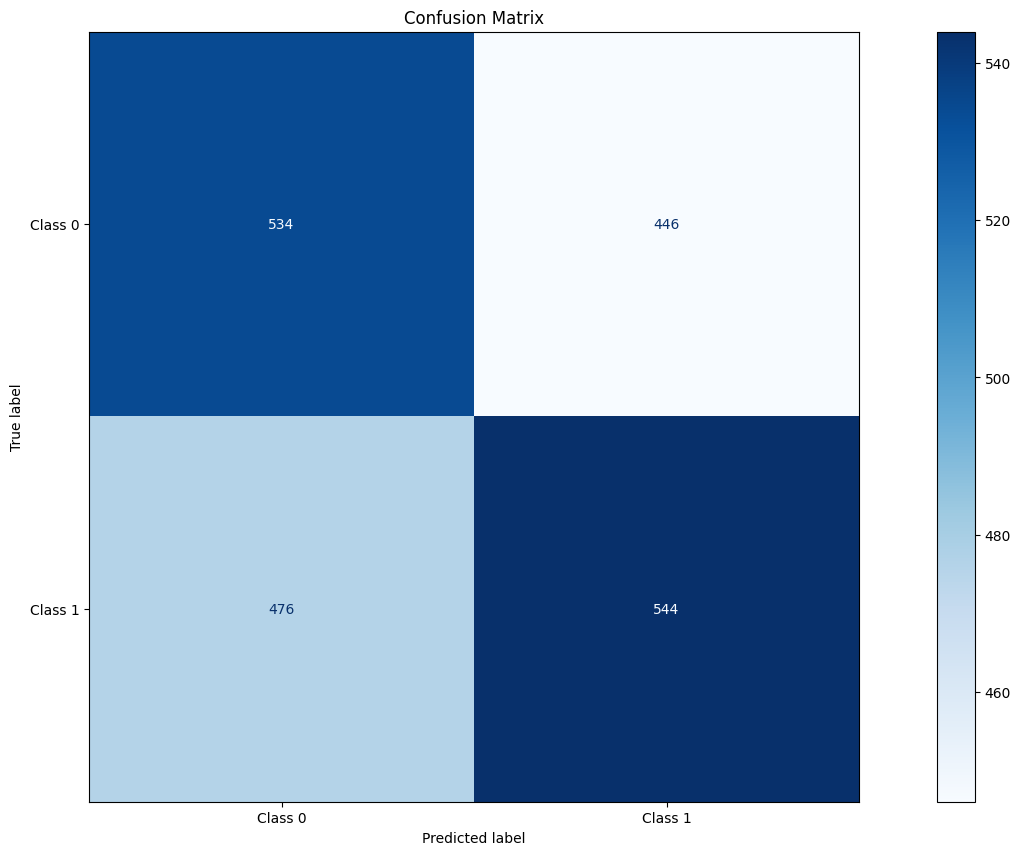

In [ ]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')

# Report your results

Check these amazing plots I have below!

RNN BaseLine Model Data:

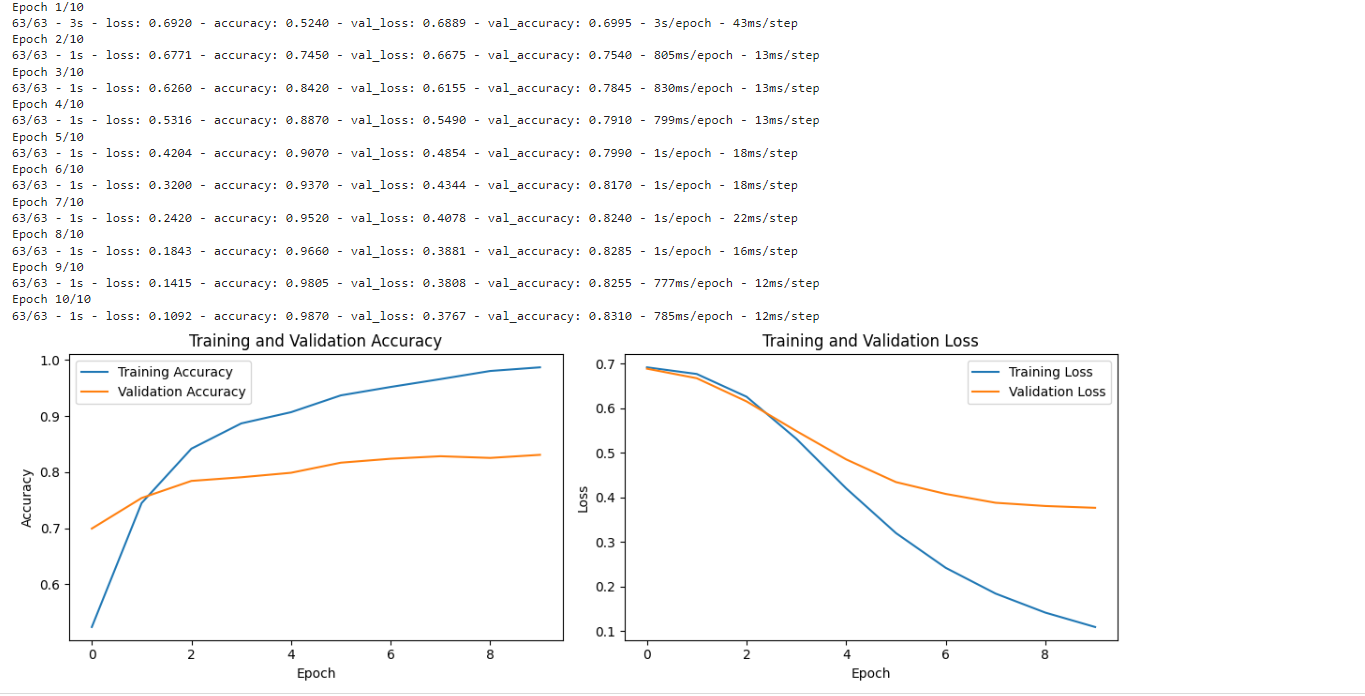

RNN Configuration 1

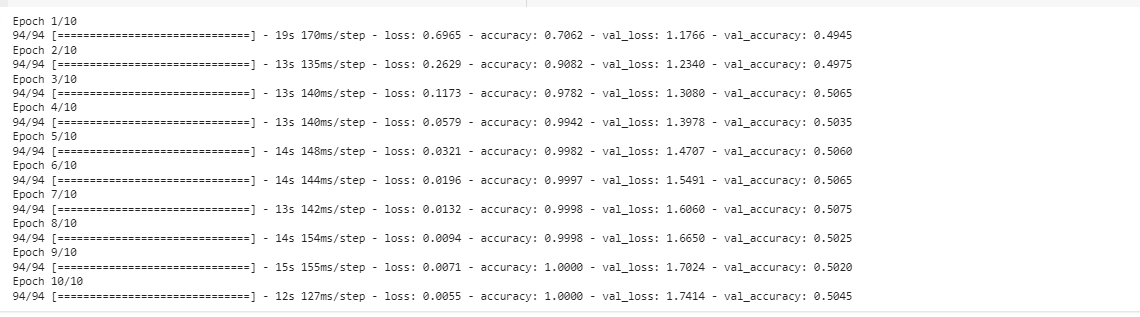


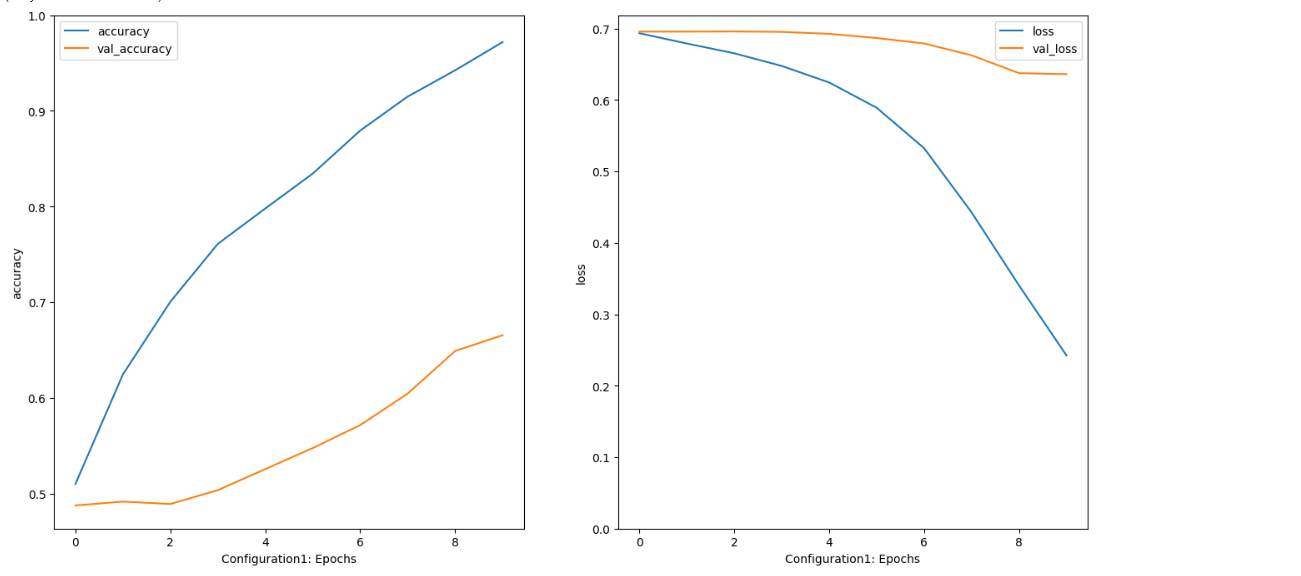

RNN Configuration 2

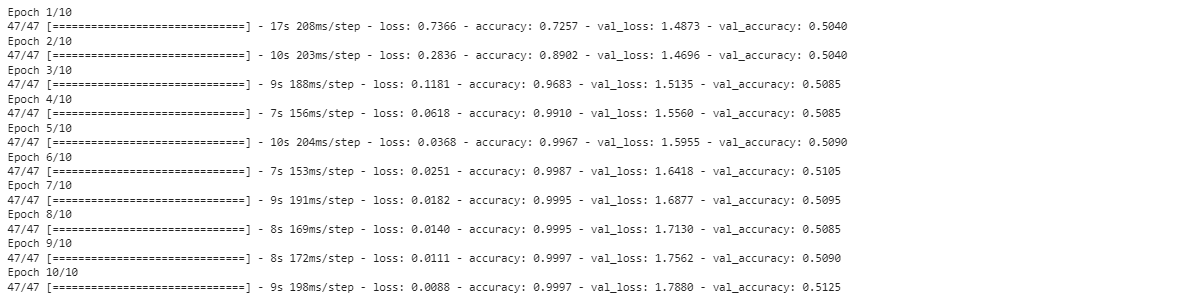

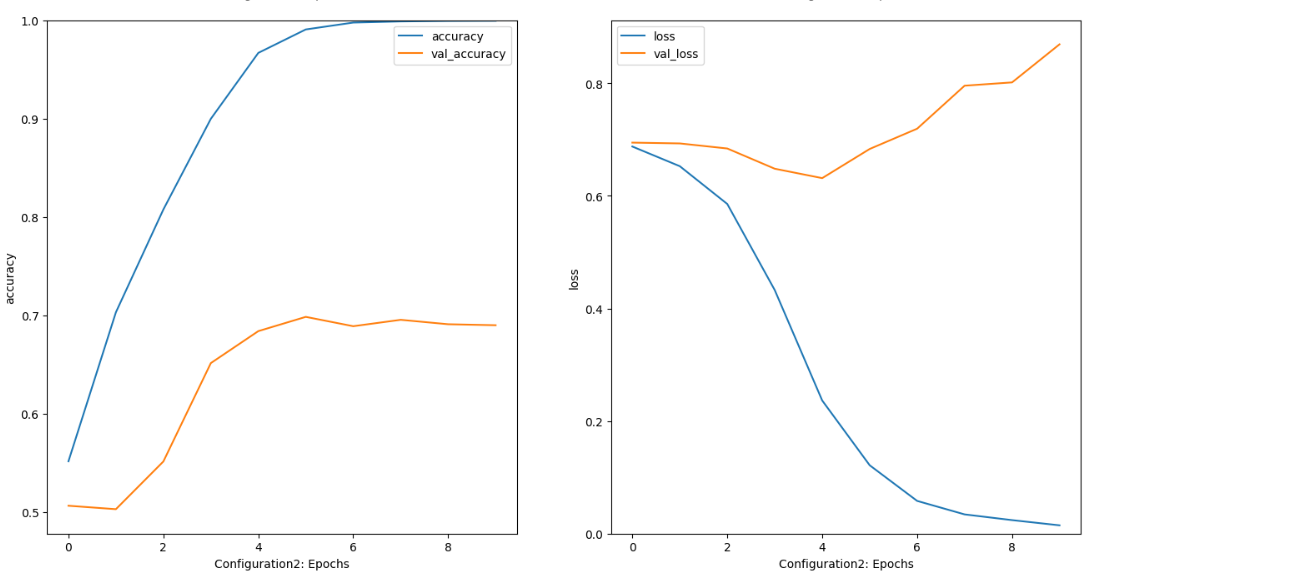

RNN Configuration 3
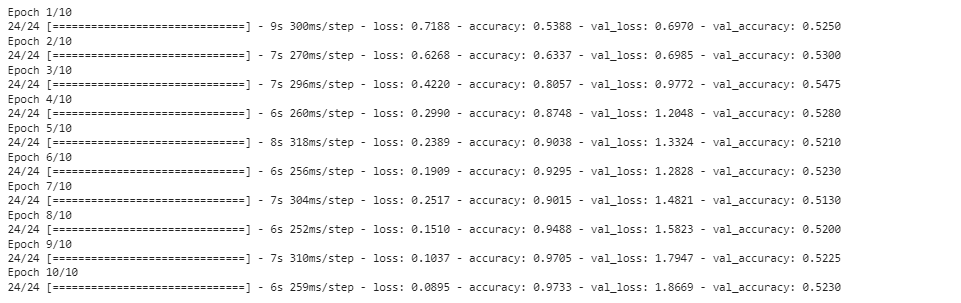


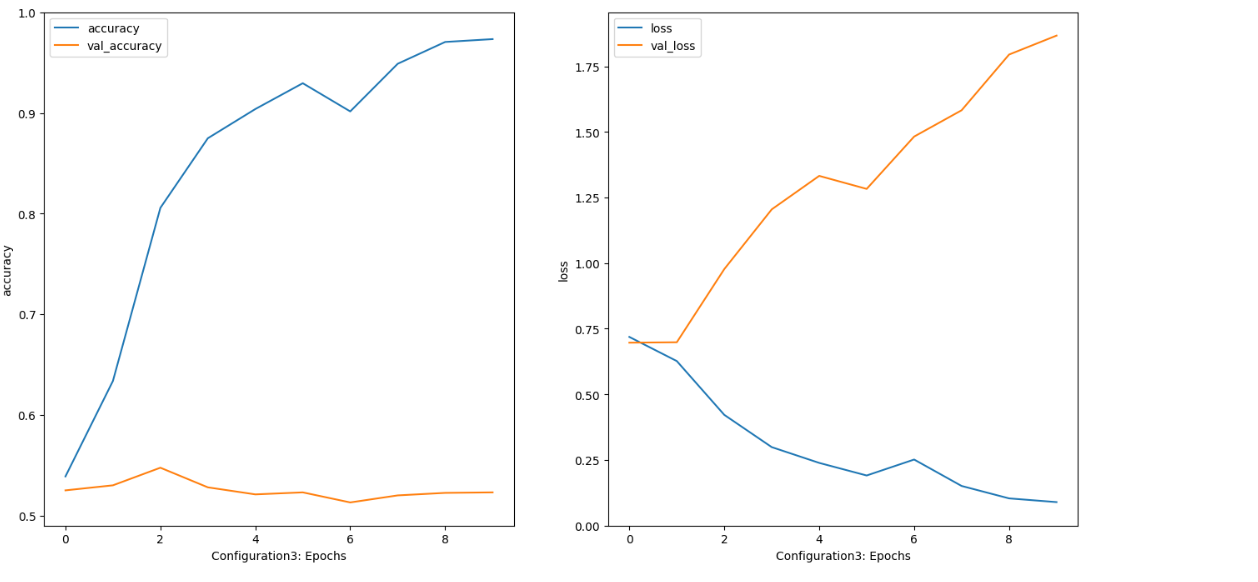

RNN Prediction Matrix

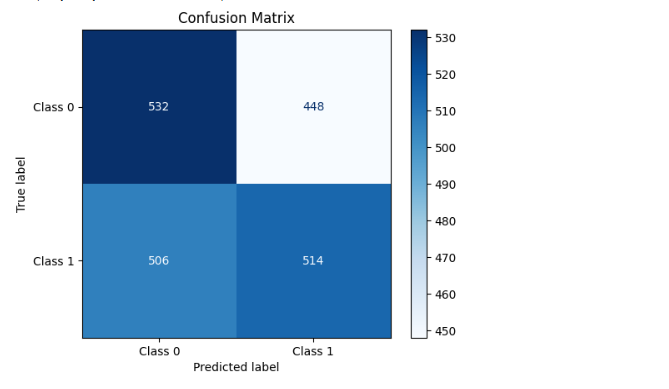

**Is the vanilla RNN better than a simple baseline?**<br>
The baseline we chose for comparison is a simple baseline model for text classification using a basic neural network architecture. The model includes a TextVectorization layer, an Embedding layer, a GlobalAveragePooling1D layer, and two Dense layers. It's designed for binary classification with a sigmoid activation function in the output layer.

Vanilla RNN ran better in our project compared to this baseline as shown in the accuracy difference with baseline reaching only 87% while RNN can reach all the  way to 96%

**How sensitive is the RNN performance to hyperparameter selection?**<br>
Observing the graph, RNN's performance has not improved significantly over epochs, which shows the need of hyperparameter tuning. RNNs are sensitive to hyperparameters such as the number of neurons, learning rate, and the number of layers. Hyperparameter tuning could potentially improve the performance of the RNN.

**Does data augmentation improve the results? More or less than for the facial recognition task? What properties of the two tasks do you think is leading to the data augmentation effects you are seeing?**<br>
For the facial recognition task, data augmentation helped but not as much as it helped in the RNN model. The RNN model was able to reach 100% accuracy fast with tuning and augmentations while for CNN model even with data augmentation it can still take awhile before its accuracy become consistent high.

We believe since RNN is using previous data over and over, tuning one piece of data to make it efficient will strongly impact future layers and that is why
RNN improved dramatically when it is enhanced with data augmentation.